# <center> Data Analysis and Machine Learning FYS-STK3155/4155 
# <center> Project 3  
# <center> Isabella Rositi 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl
import scikitplot as skplt
import xgboost as xgb

from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from math import exp, sqrt, floor, pow
from pylab import mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def R2(y_data, y_model):
    return 1 - np.mean((y_data - y_model) ** 2) / np.mean((y_data - np.mean(y_data)) ** 2)

def MSE(y_data, y_model):
    return np.mean((y_data-y_model)**2)

def accuracy_score(y_data, y_model):
    return np.mean(y_data == y_model)

def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    return onehot_vector

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def grad_sigmoid(x): #with x being the output of a sigmoid function
    return x*(1-x)

## UPLOAD DATA
### TITANIC

In [2]:
titanic = pd.read_csv("C:/Users/isabe/OneDrive/Desktop/UNI/OSLO/MACHINE LEARNING/titanic.csv")
titanic = titanic.iloc[:, [1,2,3,4,5]]
titanic = titanic.dropna()
titanic['Survived'] = pd.Categorical(titanic.Survived)
titanic['Pclass'] = pd.Categorical(titanic.Pclass)
display(titanic.head(5))
print("Number of observations:", len(titanic))

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Number of observations: 1045


In [3]:
round(titanic.describe(), 3)

,Age,Fare
count,1045.000,1045.000
mean,29.852,36.686
std,14.389,55.733
min,0.170,0.000
25%,21.000,8.050
50%,28.000,15.750
75%,39.000,35.500
max,80.000,512.329


Text(0.08, 0.5, 'Passengers')

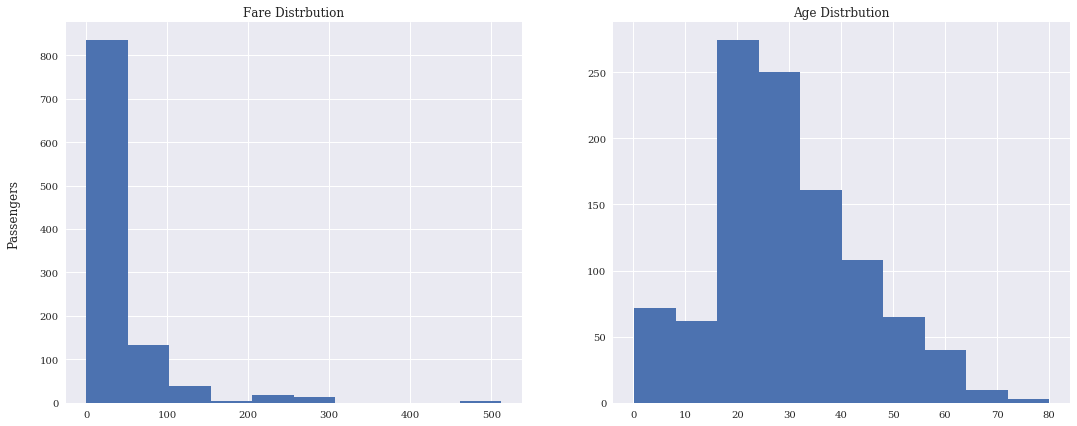

In [4]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
          
ax1.hist(titanic["Fare"])
ax2.hist(titanic["Age"])

ax1.set_title("Fare Distrbution", size = "large")
ax2.set_title("Age Distrbution", size = "large")

fig.text(0.08, 0.5, 'Passengers', va='center', rotation='vertical', size = "large")

In [5]:
titanic.groupby(["Survived"]).describe()

Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
Survived                                                                     
0         628.0  30.463232  13.871620  0.33  21.0  28.0  39.0  74.0  628.0   
1         417.0  28.931079  15.105581  0.17  19.0  28.0  38.0  80.0  417.0   

                                                                       
               mean        std  min      25%   50%      75%       max  
Survived                                                               
0         25.798917  36.804437  0.0   7.8958  13.0  27.7208  263.0000  
1         53.082096  72.836292  0.0  13.0000  26.0  63.3583  512.3292

In [6]:
titanic.groupby(["Pclass"]).describe()

Age                                                        Fare  \
        count       mean        std   min   25%   50%    75%   max  count   
Pclass                                                                      
1       284.0  39.159930  14.548028  0.92  28.0  39.0  50.00  80.0  284.0   
2       261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0  261.0   
3       500.0  24.745000  11.862896  0.17  18.0  24.0  31.25  74.0  500.0   

                                                                            
             mean        std     min       25%    50%        75%       max  
Pclass                                                                      
1       92.229358  82.601201  0.0000  35.28855  69.30  110.88330  512.3292  
2       21.855044  13.540335  9.6875  13.00000  15.75   26.00000   73.5000  
3       12.879299   9.733090  0.0000   7.77500   8.05   15.13645   69.5500

In [7]:
titanic.groupby(["Sex"]).describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                        
female  388.0  28.687088  14.576962  0.17  19.0  27.0  38.0  76.0  388.0   
male    657.0  30.539696  14.243582  0.33  21.0  28.0  39.0  80.0  657.0   

                                                                     
             mean        std   min      25%   50%     75%       max  
Sex                                                                  
female  50.308775  67.344745  6.75  13.0000  26.0  59.400  512.3292  
male    28.641019  45.750689  0.00   7.8958  13.0  29.125  512.3292

Text(0.08, 0.5, 'Passengers')

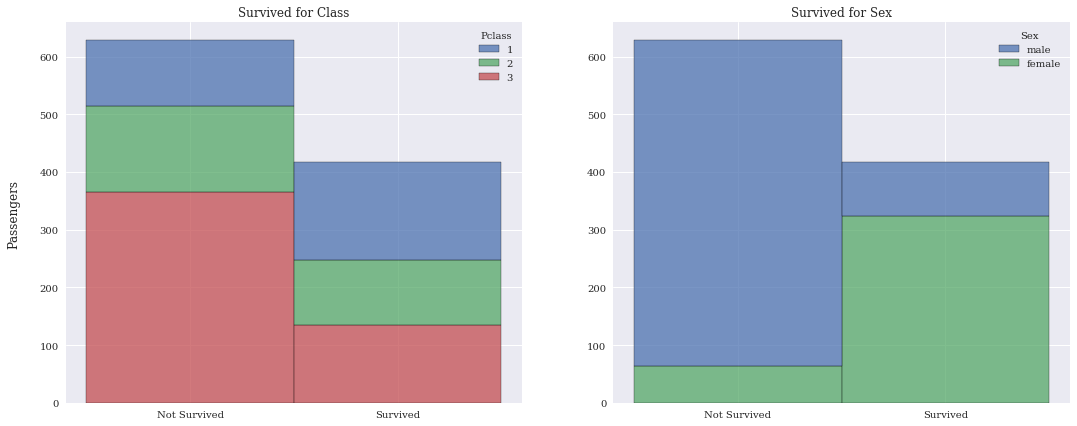

In [8]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
          
sns.histplot(binwidth=0.5, x=titanic["Survived"],  ax = ax1, hue=titanic["Pclass"], stat="count", multiple="stack")
sns.histplot(binwidth=0.5, x=titanic["Survived"], ax = ax2, hue=titanic["Sex"], stat="count", multiple="stack")

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(0, 2, 1))
ax1.set_xticklabels(["Not Survived", "Survived"])
ax1.set_title('Survived for Class', size = "large")

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks(np.arange(0, 2, 1))
ax2.set_xticklabels(["Not Survived", "Survived"])
ax2.set_title('Survived for Sex', size = "large")

fig.text(0.08, 0.5, 'Passengers', va='center', rotation='vertical', size = "large")

In [9]:
titanic.groupby(["Survived", "Sex"]).count()

Pclass  Age  Fare
Survived Sex                      
0        female      64   64    64
         male       564  564   564
1        female     324  324   324
         male        93   93    93

In [10]:
X = titanic.iloc[:,[1, 2, 3, 4]]
y = np.array(titanic["Survived"])
display(X.head(5), y)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [11]:
X["Pclass"].replace({1: 0, 2: 1, 3: 2}, inplace=True)
X["Sex"].replace({"male": 0, "female": 1}, inplace=True)

C:\Users\isabe\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
# split in train and test set

np.random.seed(919)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train_unscaled.shape)
print(X_test_unscaled.shape)
X_train = np.copy(X_train_unscaled)
X_test = np.copy(X_test_unscaled)

(836, 4)
(209, 4)


In [13]:
# standardize

scaler = StandardScaler()
scaler.fit(X_train[:, [2,3]])
X_train_cont = scaler.transform(X_train[:, [2,3]])
X_test_cont = scaler.transform(X_test[:, [2,3]])

X_train[:,2] = X_train_cont[:, 0]
X_train[:,3] = X_train_cont[:, 1]
X_test[:,2] = X_test_cont[:, 0]
X_test[:,3] = X_test_cont[:, 1]
print(X_test[0:5])

[[ 2.          0.          1.39420127 -0.5140498 ]
 [ 2.          0.         -0.68671844 -0.37340969]
 [ 2.          0.         -0.06244253 -0.53241126]
 [ 2.          0.         -0.40926248 -0.51907808]
 [ 2.          0.          1.1861093  -0.49667938]]


In [14]:
# prepare the data for the analysis

y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_onehot, y_test_onehot = to_categorical_numpy(y_train), to_categorical_numpy(y_test)

X_train_class = to_categorical_numpy(np.array(X_train[:,0]).astype(int))
X_test_class = to_categorical_numpy(np.array(X_test[:,0]).astype(int))

X_train_sex = to_categorical_numpy(np.array(X_train[:,1]).astype(int))
X_test_sex = to_categorical_numpy(np.array(X_test[:,1]).astype(int))

print(X_train_class.shape)

(836, 3)


In [15]:
#scaled 

X_train_onehot = np.append(X_train, X_train_class, axis = 1)
X_train_onehot = np.append(X_train_onehot, X_train_sex, axis = 1)
X_train_onehot = X_train_onehot[:, [2,3,4,5,6,7,8]]

X_test_onehot = np.append(X_test, X_test_class, axis = 1)
X_test_onehot = np.append(X_test_onehot, X_test_sex, axis = 1)
X_test_onehot = X_test_onehot[:, [2,3,4,5,6,7,8]]

print(X_train_onehot)

[[ 1.25547329 -0.51762994  0.         ...  1.          1.
   0.        ]
 [ 0.00692146 -0.21966679  0.         ...  1.          0.
   1.        ]
 [-0.40926248 -0.5168693   0.         ...  1.          1.
   0.        ]
 ...
 [-0.61735445 -0.27726346  0.         ...  0.          0.
   1.        ]
 [-0.75608243  0.3096741   1.         ...  0.          1.
   0.        ]
 [-0.33989849 -0.52136367  0.         ...  1.          1.
   0.        ]]


In [16]:
#unscaled

X_train_unscaled_onehot = np.append(X_train_unscaled, X_train_class, axis = 1)
X_train_unscaled_onehot = np.append(X_train_unscaled_onehot, X_train_sex, axis = 1)
X_train_unscaled_onehot = X_train_unscaled_onehot[:, [2,3,4,5,6,7,8]]

X_test_unscaled_onehot = np.append(X_test_unscaled, X_test_class, axis = 1)
X_test_unscaled_onehot = np.append(X_test_unscaled_onehot, X_test_sex, axis = 1)
X_test_unscaled_onehot = X_test_unscaled_onehot[:, [2,3,4,5,6,7,8]]

print(X_train_unscaled_onehot.shape)

(836, 7)


In [17]:
#variance scaled data
print("Variance Age:", np.var(X_train[:, 0]))
print("Variance Fare:", np.var(X_train[:,1]))

Variance Age: 0.7013962020100273
Variance Fare: 0.23511366498019737


In [18]:
#variance unscaled data
print("Variance Age:", np.var(X_train_unscaled["Age"]))
print("Variance Fare:", np.var(X_train_unscaled["Fare"]))

Variance Age: 207.8413047383308
Variance Fare: 2991.0677750616837


## Logistic Regression

In [19]:
class RegularizedLogisticRegression:
    def __init__(self, eta, num_iter, fit_intercept, reg, verbose=False):
        self.eta = eta
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.reg = reg
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h.ravel() - y.ravel())) / y.size
            self.theta -= self.eta * (gradient + self.reg * self.theta/y.size)
            
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X) > 0.5  

In [20]:
etas = np.logspace(-5, -1, 5)
lambdas = np.logspace(-4, 1, 6)

In [21]:
# Logistic Regression with intercept, L2 regularization and 10.000, 50.000 and 100.000 iterations

test_accuracy_lo1, test_accuracy_lo2, test_accuracy_lo3 = np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas)))
max_acc_lo1, max_acc_lo2, max_acc_lo3 = 0, 0, 0
iterations = np.array((10000, 50000, 100000))

np.random.seed(32)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for it in iterations:
            lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=True, reg = lmb)
            lo.fit(X_train_onehot, y_train)

            y_pred = lo.predict(X_test_onehot)
            
            if it == 10000:
                test_accuracy_lo1[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo1[i][j] > max_acc_lo1:
                    max_acc_lo1 = test_accuracy_lo1[i][j]          
                    best_eta_lo1 = eta
                    best_lambda_lo1 = lmb
                    y_pred_lo1 = y_pred
                    
            elif it == 50000:
                test_accuracy_lo2[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo2[i][j] > max_acc_lo2:
                    max_acc_lo2 = test_accuracy_lo2[i][j]          
                    best_eta_lo2 = eta
                    best_lambda_lo2 = lmb
                    y_pred_lo2 = y_pred
                
            else:
                test_accuracy_lo3[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo3[i][j] > max_acc_lo3:
                    max_acc_lo3 = test_accuracy_lo3[i][j]          
                    best_eta_lo3 = eta
                    best_lambda_lo3 = lmb
                    y_pred_lo3 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo1.round(4)*100, "%")
print("Best eta 10000 iter = ", best_eta_lo1)
print("Best lambda 10000 iter = ", best_lambda_lo1)

print("Best Accuracy 50000 iter = ", max_acc_lo2.round(4)*100, "%")
print("Best eta 50000 iter = ", best_eta_lo2)
print("Best lambda 50000 iter = ", best_lambda_lo2)

print("Best Accuracy 100000 iter = ", max_acc_lo3.round(4)*100, "%")
print("Best eta 100000 iter = ", best_eta_lo3)
print("Best lambda 100000 iter = ", best_lambda_lo3)

Best Accuracy 10000 iter =  87.08 %
Best eta 10000 iter =  0.001
Best lambda 10000 iter =  0.0001
Best Accuracy 50000 iter =  86.6 %
Best eta 50000 iter =  0.001
Best lambda 50000 iter =  0.0001
Best Accuracy 100000 iter =  87.08 %
Best eta 100000 iter =  0.0001
Best lambda 100000 iter =  0.0001


In [22]:
mse_log= np.stack((max_acc_lo1.round(5)*100, best_eta_lo1, "10.000 iter", best_lambda_lo1, "Logistic"), axis = -1)
mse_log = pd.DataFrame(mse_log)   
mse_log = mse_log.T
mse_log.columns = ["Accuracy", "Learning Rate", "Ripetitions", "Regularization","Model"]

mse_log.loc[1] = [max_acc_lo2.round(4)*100, best_eta_lo2, "50.000 iter", best_lambda_lo2, "Logistic"]
mse_log.loc[2] = [max_acc_lo3.round(4)*100, best_eta_lo3, "100.000 iter", best_lambda_lo3, "Logistic"]
display(mse_log)

,Accuracy,Learning Rate,Ripetitions,Regularization,Model
0,87.081,0.001,10.000 iter,0.0001,Logistic
1,86.6,0.001,50.000 iter,0.0001,Logistic
2,87.08,0.0001,100.000 iter,0.0001,Logistic


In [23]:
# Logistic Regression without intercept, L2 regularization and 10.000, 50.000 and 100.000 iterations

test_accuracy_lo4, test_accuracy_lo5, test_accuracy_lo6 = np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas))), np.zeros(((len(etas)), len(lambdas)))
max_acc_lo4, max_acc_lo5, max_acc_lo6 = 0, 0, 0

np.random.seed(32)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for it in iterations:
            lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=False, reg = lmb)
            lo.fit(X_train_onehot, y_train)

            y_pred = lo.predict(X_test_onehot)
            
            if it == 10000:
                test_accuracy_lo4[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo4[i][j] > max_acc_lo4:
                    max_acc_lo4 = test_accuracy_lo4[i][j]          
                    best_eta_lo4 = eta
                    best_lambda_lo4 = lmb
                    y_pred_lo4 = y_pred
                    
            elif it == 50000:
                test_accuracy_lo5[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo5[i][j] > max_acc_lo5:
                    max_acc_lo5 = test_accuracy_lo5[i][j]          
                    best_eta_lo5 = eta
                    best_lambda_lo5 = lmb
                    y_pred_lo5 = y_pred
                
            else:
                test_accuracy_lo6[i][j] = accuracy_score(y_test, y_pred)
                if test_accuracy_lo6[i][j] > max_acc_lo6:
                    max_acc_lo6 = test_accuracy_lo6[i][j]          
                    best_eta_lo6 = eta
                    best_lambda_lo6 = lmb
                    y_pred_lo6 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo4.round(4)*100, "%")
print("Best eta 10000 iter = ", best_eta_lo4.round(4))
print("Best lambda 10000 iter = ", best_lambda_lo4.round(4))

print("Best Accuracy 50000 iter = ", max_acc_lo5.round(4)*100, "%")
print("Best eta 50000 iter = ", best_eta_lo5.round(4))
print("Best lambda 50000 iter = ", best_lambda_lo5.round(4))

print("Best Accuracy 100000 iter = ", max_acc_lo6.round(4)*100, "%")
print("Best eta 100000 iter = ", best_eta_lo6.round(4))
print("Best lambda 100000 iter = ", best_lambda_lo6.round(4))

Best Accuracy 10000 iter =  87.08 %
Best eta 10000 iter =  0.001
Best lambda 10000 iter =  0.0001
Best Accuracy 50000 iter =  86.6 %
Best eta 50000 iter =  0.0001
Best lambda 50000 iter =  0.0001
Best Accuracy 100000 iter =  87.08 %
Best eta 100000 iter =  0.0001
Best lambda 100000 iter =  0.0001


There is no difference between considering and leaving out the intercept 

In [24]:
# Logistic Regression with intercept, no L2 regularization and 10.000, 50.000, 100.000 iterations

test_accuracy_lo7, test_accuracy_lo8, test_accuracy_lo9 = np.zeros((len(etas))), np.zeros((len(etas))), np.zeros((len(etas)))
max_acc_lo7, max_acc_lo8, max_acc_lo9 = 0, 0, 0

np.random.seed(32)
for i, eta in enumerate(etas):
    for it in iterations:
        lo = RegularizedLogisticRegression(eta = eta, num_iter = it, fit_intercept=True, reg = 0)
        lo.fit(X_train_onehot, y_train)

        y_pred = lo.predict(X_test_onehot)
        
        if it == 10000:
            test_accuracy_lo7[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo7[i] > max_acc_lo7:
                max_acc_lo7 = test_accuracy_lo7[i]         
                best_eta_lo7 = eta
                y_pred_lo7 = y_pred
                    
        elif it == 50000:
            test_accuracy_lo8[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo8[i] > max_acc_lo8:
                max_acc_lo8 = test_accuracy_lo8[i]         
                best_eta_lo8 = eta
                y_pred_lo8 = y_pred
                
        else:
            test_accuracy_lo9[i] = accuracy_score(y_test, y_pred)
            if test_accuracy_lo9[i] > max_acc_lo9:
                max_acc_lo9 = test_accuracy_lo9[i]          
                best_eta_lo9 = eta
                y_pred_lo9 = y_pred


print("Best Accuracy 10000 iter = ", max_acc_lo7.round(4)*100, "%")
print("Best eta 10000 iter = ", best_eta_lo7.round(4))

print("Best Accuracy 50000 iter = ", max_acc_lo8.round(4)*100, "%")
print("Best eta 50000 iter = ", best_eta_lo8.round(4))

print("Best Accuracy 100000 iter = ", max_acc_lo9.round(4)*100, "%")
print("Best eta 100000 iter = ", best_eta_lo9.round(4))

Best Accuracy 10000 iter =  87.08 %
Best eta 10000 iter =  0.001
Best Accuracy 50000 iter =  86.6 %
Best eta 50000 iter =  0.001
Best Accuracy 100000 iter =  87.08 %
Best eta 100000 iter =  0.0001


In [25]:
mse_log.loc[3] = [max_acc_lo7.round(5)*100, best_eta_lo7, "10.000 iter", 0, "Logistic"]
mse_log.loc[4] = [max_acc_lo8.round(4)*100, best_eta_lo8, "50.000 iter", 0, "Logistic"]
mse_log.loc[5] = [max_acc_lo9.round(4)*100, best_eta_lo9, "100.000 iter", 0, "Logistic"]
display(mse_log)

,Accuracy,Learning Rate,Ripetitions,Regularization,Model
0,87.081,0.001,10.000 iter,0.0001,Logistic
1,86.6,0.001,50.000 iter,0.0001,Logistic
2,87.08,0.0001,100.000 iter,0.0001,Logistic
3,87.081,0.001,10.000 iter,0,Logistic
4,86.6,0.001,50.000 iter,0,Logistic
5,87.08,0.0001,100.000 iter,0,Logistic


In [26]:
# Let's create a table with the best models for each method

mse_best = np.stack((max_acc_lo7.round(5)*100, "Logistic"), axis = -1)
mse_best = pd.DataFrame(mse_best)   
mse_best = mse_best.T
mse_best.columns = ["Accuracy", "Model"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic


## Neural Networks

In [27]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def grad_sigmoid(x): #with x being the output of a sigmoid function
    return x*(1-x)

def relu(x):
    r = np.maximum(0, x)
    return r

def grad_relu(x): #with x being the same input as in relu
    r = np.zeros((x.shape[0], x.shape[1]))
    r[x<=0] = 0
    r[x>0] = 1
    return r

def leaky_relu(x):
    alpha = 0.1
    lr = np.maximum(alpha*x, x)
    return lr

def grad_leaky_relu(x):   #with x being the same input as in leaky_relu
    lr = np.zeros((x.shape[0], x.shape[1]))
    lr[x<=0] = 0.01
    lr[x>0] = 1
    return lr

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

In [28]:
class NeuralNetwork:
    def __init__(self, X, y, n_hidden_neurons, n_categories, n_hidden_layers, epochs, batch_size, eta, lmb, activation, weight):

        self.X_full = X
        self.y_full = y

        self.n_inputs = X.shape[0]
        self.n_features = X.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories
        self.n_hidden_layers = n_hidden_layers

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmb = lmb
        self.activation = activation
        self.weight = weight

        self.create_biases_and_weights()
        
    def create_biases_and_weights(self):
        self.w = []
        if self.weight == 0:
            self.w.append(np.zeros((self.n_features, self.n_hidden_neurons)))
            for i in range(1, self.n_hidden_layers):
                self.hidden_weights = np.zeros((self.n_hidden_neurons, self.n_hidden_neurons))
                self.w.append(self.hidden_weights)
            self.hidden_bias = np.zeros(self.n_hidden_neurons)
            self.output_weights = np.zeros((self.n_hidden_neurons, self.n_categories))
            self.output_bias = np.zeros(self.n_categories)
        else:
            self.w.append(np.random.randn(self.n_features, self.n_hidden_neurons))
            for i in range(1, self.n_hidden_layers):
                self.hidden_weights = np.random.randn(self.n_hidden_neurons, self.n_hidden_neurons)
                self.w.append(self.hidden_weights)
            self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01
            self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
            self.output_bias = np.zeros(self.n_categories) + 0.01
    

    def feed_forward(self):
        # feed-forward for training
        self.a = []
        self.z = []
        self.z_h = np.matmul(self.X, self.w[0]) + self.hidden_bias
        self.a_h = self.activation(self.z_h)
        self.a.append(self.a_h)
        self.z.append(self.z_h)
        
        for i in range(1, self.n_hidden_layers):
            self.z_h = np.matmul(self.a[i-1], self.w[i]) + self.hidden_bias
            self.a_h = self.activation(self.z_h)
            self.a.append(self.a_h)
            self.z.append(self.z_h)

        self.z_o = np.matmul(self.a[n_hidden_layers-1], self.output_weights) + self.output_bias
        
        if self.n_categories > 1:
            exp_term = np.exp(self.z_o)
            self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        

    def feed_forward_out(self, X):
        # feed-forward for output
        a = []
        z = []
        z_h = np.matmul(X, self.w[0]) + self.hidden_bias
        a_h = self.activation(z_h)
        a.append(a_h)
        z.append(z_h)
        
        for i in range(1, self.n_hidden_layers):
            z_h = np.matmul(a_h, self.w[i]) + self.hidden_bias
            a_h = self.activation(z_h)
            a.append(a_h)
            z.append(z_h)

        z_o = np.matmul(a[n_hidden_layers-1], self.output_weights) + self.output_bias

        if self.n_categories > 1:
            exp_term = np.exp(z_o)
            probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
            return probabilities
        else:
            return z_o

    
    def backpropagation(self):
        
        if self.n_categories > 1:
            error_output = self.probabilities - self.y
        else:
            error_output = self.z_o - self.y
        
        self.a.reverse()
        self.z.reverse()
        self.w.reverse()
        self.err_h = []
        
        if self.activation == sigmoid:
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_sigmoid(self.a[0]) 
        elif self.activation == relu: 
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_relu(self.z[0]) 
        else:
            error_hidden = np.matmul(error_output, self.output_weights.T) * grad_leaky_relu(self.z[0]) 
        self.err_h.append(error_hidden)
        
        for i in range(1, self.n_hidden_layers):
            if self.activation == sigmoid:
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_sigmoid(self.a[i]) 
                self.err_h.append(error_hidden)
            elif self.activation == relu: 
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_relu(self.z[i]) 
                self.err_h.append(error_hidden)
            else:
                error_hidden = np.matmul(self.err_h[i-1], self.w[i-1].T) * grad_leaky_relu(self.z[i]) 
                self.err_h.append(error_hidden)
        
        self.output_weights_gradient = np.matmul(self.a[0].T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)
        
        self.g = []
        for i in range(1, self.n_hidden_layers):
            self.hidden_weights_gradient = np.matmul(self.a[i].T, self.err_h[i-1])
            self.g.append(self.hidden_weights_gradient)
            
        self.hidden_weights_gradient = np.matmul(self.X.T, self.err_h[-1])
        self.g.append(self.hidden_weights_gradient)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmb > 0.0:
            self.output_weights_gradient += self.lmb * self.output_weights
            for i in range(len(self.w)):
                self.g[i] += self.lmb * self.w[i]
        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        
        for i in range(len(self.w)):
            self.w[i] -= self.eta * self.g[i]
        self.hidden_bias -= self.eta * self.hidden_bias_gradient
       
        self.a.reverse()
        self.z.reverse()
        self.w.reverse()
        
    def predict(self, X):
        if self.n_categories > 1:
            probabilities = self.feed_forward_out(X)
            return np.argmax(probabilities, axis=1)
        else:
            values = self.feed_forward_out(X) 
            return values 

    def predict_probabilities(self, X):
        if self.n_categories > 1:
            probabilities = self.feed_forward_out(X)
            return probabilities
  
    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False)

                self.X = self.X_full[chosen_datapoints]
                self.y = self.y_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation() 

In [29]:
# setting up parameters

n_tr = len(y_train)
features = X_train_onehot.shape[1]

M = 8
m = int(n_tr/M) #104
n_categories = 2
epochs_nn = 25
layers = np.array((1, 2, 3))                                 

In [30]:
# Neural Network with 1,2,3 hidden layers, 30 hidden nodes and sigmoid

test_accuracy_nnc1, test_accuracy_nnc2, test_accuracy_nnc3 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc1, max_acc_nnc2, max_acc_nnc3 = 0,0,0
n_hidden_neurons=30

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers=n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = sigmoid, weight = 0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if n_hidden_layers == 1:
                test_accuracy_nnc1[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc1[i][j] > max_acc_nnc1:
                    max_acc_nnc1 = test_accuracy_nnc1[i][j]
                    best_eta_nnc1 = eta
                    best_lambda_nnc1 = lmb
                    y_predict_nnc1 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc2[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc2[i][j] > max_acc_nnc2:
                    max_acc_nnc2 = test_accuracy_nnc2[i][j]
                    best_eta_nnc2 = eta
                    best_lambda_nnc2 = lmb
                    y_predict_nnc2 = y_predict
            
            else:
                test_accuracy_nnc3[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc3[i][j] > max_acc_nnc3:
                    max_acc_nnc3 = test_accuracy_nnc3[i][j]
                    best_eta_nnc3 = eta
                    best_lambda_nnc3 = lmb
                    y_predict_nnc3 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc1.round(3)*100, "%")
print("Best eta 1 HL = ", best_eta_nnc1.round(4))
print("Best lambda 1 HL= ", best_lambda_nnc1.round(4))
print()
print("Best Accuracy 2 HL = ", max_acc_nnc2.round(4)*100, "%")
print("Best eta 2 HL = ", best_eta_nnc2.round(4))
print("Best lambda 2 HL= ", best_lambda_nnc2.round(4))
print()
print("Best Accuracy 3 HL = ", max_acc_nnc3.round(4)*100, "%")
print("Best eta 3 HL = ", best_eta_nnc3.round(4))
print("Best lambda 3 HL= ", best_lambda_nnc3.round(4))

Best Accuracy 1 HL =  88.0 %
Best eta 1 HL =  0.1
Best lambda 1 HL=  0.0001

Best Accuracy 2 HL =  88.52 %
Best eta 2 HL =  0.1
Best lambda 2 HL=  0.0001

Best Accuracy 3 HL =  87.08 %
Best eta 3 HL =  0.01
Best lambda 3 HL=  0.01


In [31]:
mse_class = np.stack((max_acc_nnc1.round(3)*100, best_eta_nnc1, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc1, "Sigmoid", "NN"), axis = -1)
mse_class = pd.DataFrame(mse_class)   
mse_class = mse_class.T
mse_class.columns = ["Accuracy", "Learning Rate", "Ripetitions", "Mini-Batches Size", "Hidden Layers", "Hidden Neurons", 
                    "Regularization", "Activation", "Model"]

mse_class.loc[1] = [max_acc_nnc2.round(4)*100, best_eta_nnc2,  "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc2, "Sigmoid", "NN"]
mse_class.loc[2] = [max_acc_nnc3.round(4)*100, best_eta_nnc3, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc3, "Sigmoid", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN


In [32]:
# Neural Network with 1,2,3 hidden layers, 30 hidden nodes and ReLU

test_accuracy_nnc4, test_accuracy_nnc5, test_accuracy_nnc6 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc4, max_acc_nnc5, max_acc_nnc6 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if n_hidden_layers == 1:
                test_accuracy_nnc4[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc4[i][j] > max_acc_nnc4:
                    max_acc_nnc4 = test_accuracy_nnc4[i][j]
                    best_eta_nnc4 = eta
                    best_lambda_nnc4 = lmb
                    y_predict_nnc4 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc5[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc5[i][j] > max_acc_nnc5:
                    max_acc_nnc5 = test_accuracy_nnc5[i][j]
                    best_eta_nnc5 = eta
                    best_lambda_nnc5 = lmb
                    y_predict_nnc5 = y_predict
            
            else:
                test_accuracy_nnc6[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc6[i][j] > max_acc_nnc6:
                    max_acc_nnc6 = test_accuracy_nnc6[i][j]
                    best_eta_nnc6 = eta
                    best_lambda_nnc6 = lmb
                    y_predict_nnc6 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc4.round(4)*100, "%")
print("Best eta 1 HL = ", best_eta_nnc4.round(4))
print("Best lambda 1 HL= ", best_lambda_nnc4.round(4))
print()
print("Best Accuracy 2 HL = ", max_acc_nnc5.round(4)*100, "%")
print("Best eta 2 HL = ", best_eta_nnc5.round(4))
print("Best lambda 2 HL= ", best_lambda_nnc5.round(4))
print()
print("Best Accuracy 3 HL = ", max_acc_nnc6.round(4)*100, "%")
print("Best eta 3 HL = ", best_eta_nnc6.round(4))
print("Best lambda 3 HL= ", best_lambda_nnc6.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  87.56 %
Best eta 1 HL =  0.01
Best lambda 1 HL=  0.01

Best Accuracy 2 HL =  89.0 %
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best Accuracy 3 HL =  87.08 %
Best eta 3 HL =  0.001
Best lambda 3 HL=  0.1


In [33]:
mse_class.loc[3] = [max_acc_nnc4.round(4)*100, best_eta_nnc4, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc4, "ReLU", "NN"]
mse_class.loc[4] = [max_acc_nnc5.round(4)*100, best_eta_nnc5, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc5, "ReLU", "NN"]
mse_class.loc[5] = [max_acc_nnc6.round(4)*100, best_eta_nnc6, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc6, "ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN


In [34]:
# Neural Network with 1,2,3 hidden layers 30 hidden nodes and Leaky-ReLU

test_accuracy_nnc7, test_accuracy_nnc8, test_accuracy_nnc9 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc7, max_acc_nnc8, max_acc_nnc9 = 0,0,0

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for n_hidden_layers in layers:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = leaky_relu, weight=0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if n_hidden_layers == 1:
                test_accuracy_nnc7[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc7[i][j] > max_acc_nnc7:
                    max_acc_nnc7 = test_accuracy_nnc7[i][j]
                    best_eta_nnc7 = eta
                    best_lambda_nnc7 = lmb
                    y_predict_nnc7 = y_predict
           
            elif n_hidden_layers == 2:
                test_accuracy_nnc8[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc8[i][j] > max_acc_nnc8:
                    max_acc_nnc8 = test_accuracy_nnc8[i][j]
                    best_eta_nnc8 = eta
                    best_lambda_nnc8 = lmb
                    y_predict_nnc8 = y_predict
            
            else:
                test_accuracy_nnc9[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc9[i][j] > max_acc_nnc9:
                    max_acc_nnc9 = test_accuracy_nnc9[i][j]
                    best_eta_nnc9 = eta
                    best_lambda_nnc9 = lmb
                    y_predict_nnc9 = y_predict
                    

print("Best Accuracy 1 HL = ", max_acc_nnc7.round(4)*100, "%")
print("Best eta 1 HL = ", best_eta_nnc7.round(4))
print("Best lambda 1 HL= ", best_lambda_nnc7.round(4))
print()
print("Best Accuracy 2 HL = ", max_acc_nnc8.round(4)*100, "%")
print("Best eta 2 HL = ", best_eta_nnc8.round(4))
print("Best lambda 2 HL= ", best_lambda_nnc8.round(4))
print()
print("Best Accuracy 3 HL = ", max_acc_nnc9.round(4)*100, "%")
print("Best eta 3 HL = ", best_eta_nnc9.round(4))
print("Best lambda 3 HL= ", best_lambda_nnc9.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy 1 HL =  87.56 %
Best eta 1 HL =  0.0001
Best lambda 1 HL=  0.01

Best Accuracy 2 HL =  88.52 %
Best eta 2 HL =  0.001
Best lambda 2 HL=  0.0001

Best Accuracy 3 HL =  87.56 %
Best eta 3 HL =  0.0001
Best lambda 3 HL=  1.0


In [35]:
mse_class.loc[6] = [max_acc_nnc7.round(4)*100, best_eta_nnc7, "25 epochs", M, 1, n_hidden_neurons, best_lambda_nnc7, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[7] = [max_acc_nnc8.round(4)*100, best_eta_nnc8, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc8, 
                    "Leaky-ReLU", "NN"]
mse_class.loc[8] = [max_acc_nnc9.round(4)*100, best_eta_nnc9, "25 epochs", M, 3, n_hidden_neurons, best_lambda_nnc9, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN
6,87.56,0.0001,25 epochs,8,1,30,0.01,Leaky-ReLU,NN
7,88.52,0.001,25 epochs,8,2,30,0.0001,Leaky-ReLU,NN
8,87.56,0.0001,25 epochs,8,3,30,1.0,Leaky-ReLU,NN


The best models are the ones with 2 hidden layers, so I am going to keep 3 hidden layers and change the other parameters, for example the activation functions, the number of hidden nodes and the mini-batch size.

In [36]:
# Neural Network with 2 hidden layers, 50 hidden nodes: sigmoid, ReLU and Leaky-ReLU

test_accuracy_nnc10, test_accuracy_nnc11, test_accuracy_nnc12 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc10, max_acc_nnc11, max_acc_nnc12 = 0,0,0
n_hidden_neurons = 50
fun = np.array((sigmoid, relu, leaky_relu))
n_hidden_layers = 2

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for f in fun:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, epochs=epochs_nn, 
                               batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = f, weight=0.01)
            
            nn.train()
            y_predict = nn.predict(X_test_onehot)
            
            if f == sigmoid:
                test_accuracy_nnc10[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc10[i][j] > max_acc_nnc10:
                    max_acc_nnc10 = test_accuracy_nnc10[i][j]
                    best_eta_nnc10 = eta
                    best_lambda_nnc10 = lmb
                    y_predict_nnc10 = y_predict
           
            elif f == relu:
                test_accuracy_nnc11[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc11[i][j] > max_acc_nnc11:
                    max_acc_nnc11 = test_accuracy_nnc11[i][j]
                    best_eta_nnc11 = eta
                    best_lambda_nnc11 = lmb
                    y_predict_nnc11 = y_predict
            
            else:
                test_accuracy_nnc12[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc12[i][j] > max_acc_nnc12:
                    max_acc_nnc12 = test_accuracy_nnc12[i][j]
                    best_eta_nnc12 = eta
                    best_lambda_nnc12 = lmb
                    y_predict_nnc12 = y_predict
                    

print("Best Accuracy Sigmoid = ", max_acc_nnc10.round(4)*100, "%")
print("Best eta Sigmoid = ", best_eta_nnc10)
print("Best lambda Sigmoid  ", best_lambda_nnc10.round(4))
print()
print("Best Accuracy ReLU = ", max_acc_nnc11.round(4)*100, "%")
print("Best eta ReLU = ", best_eta_nnc11.round(4))
print("Best lambda ReLU  ", best_lambda_nnc11.round(4))
print()
print("Best Accuracy Leaky-ReLU = ", max_acc_nnc12.round(4)*100, "%")
print("Best eta Leaky-ReLU = ", best_eta_nnc12)
print("Best lambda Leaky-ReLU= ", best_lambda_nnc12.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy Sigmoid =  88.52 %
Best eta Sigmoid =  0.01
Best lambda Sigmoid   0.0001

Best Accuracy ReLU =  88.03999999999999 %
Best eta ReLU =  0.001
Best lambda ReLU   0.1

Best Accuracy Leaky-ReLU =  88.52 %
Best eta Leaky-ReLU =  0.01
Best lambda Leaky-ReLU=  0.0001


In [37]:
mse_class.loc[9] = [max_acc_nnc10.round(3)*100, best_eta_nnc10, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc10, 
                    "Sigmoid", "NN"]
mse_class.loc[10] = [max_acc_nnc11.round(4)*100, best_eta_nnc11, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc11, 
                    "ReLU", "NN"]
mse_class.loc[11] = [max_acc_nnc12.round(3)*100, best_eta_nnc12, "25 epochs", M, 2, n_hidden_neurons, best_lambda_nnc12, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN
6,87.56,0.0001,25 epochs,8,1,30,0.01,Leaky-ReLU,NN
7,88.52,0.001,25 epochs,8,2,30,0.0001,Leaky-ReLU,NN
8,87.56,0.0001,25 epochs,8,3,30,1.0,Leaky-ReLU,NN
9,88.5,0.01,25 epochs,8,2,50,0.0001,Sigmoid,NN


In [38]:
# Neural Network with 2 hidden layers, 30 hidden nodes: sigmoid, ReLU and Leaky-ReLU (M = 16)

test_accuracy_nnc13, test_accuracy_nnc14, test_accuracy_nnc15 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc13, max_acc_nnc14, max_acc_nnc15 = 0,0,0
M = 16
n_hidden_neurons = 30

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for f in fun:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs_nn, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = f, weight=0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if f == sigmoid:
                test_accuracy_nnc13[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc13[i][j] > max_acc_nnc13:
                    max_acc_nnc13 = test_accuracy_nnc13[i][j]
                    best_eta_nnc13 = eta
                    best_lambda_nnc13 = lmb
                    y_predict_nnc13 = y_predict
           
            elif f == relu:
                test_accuracy_nnc14[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc14[i][j] > max_acc_nnc14:
                    max_acc_nnc14 = test_accuracy_nnc14[i][j]
                    best_eta_nnc14 = eta
                    best_lambda_nnc14 = lmb
                    y_predict_nnc14 = y_predict
            
            else:
                test_accuracy_nnc15[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc15[i][j] > max_acc_nnc15:
                    max_acc_nnc15 = test_accuracy_nnc15[i][j]
                    best_eta_nnc15 = eta
                    best_lambda_nnc15 = lmb
                    y_predict_nnc15 = y_predict
                    

print("Best Accuracy Sigmoid = ", max_acc_nnc13.round(4)*100, "%")
print("Best eta Sigmoid = ", best_eta_nnc13.round(4))
print("Best lambda Sigmoid  ", best_lambda_nnc13.round(4))
print()
print("Best Accuracy ReLU = ", max_acc_nnc14.round(4)*100, "%")
print("Best eta ReLU = ", best_eta_nnc14)
print("Best lambda ReLU = ", best_lambda_nnc14.round(4))
print()
print("Best Accuracy Leaky-ReLU = ", max_acc_nnc15.round(4)*100, "%")
print("Best eta Leaky-ReLU = ", best_eta_nnc15)
print("Best lambda Leaky-ReLU = ", best_lambda_nnc15.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy Sigmoid =  88.03999999999999 %
Best eta Sigmoid =  0.01
Best lambda Sigmoid   0.001

Best Accuracy ReLU =  88.03999999999999 %
Best eta ReLU =  0.01
Best lambda ReLU =  0.01

Best Accuracy Leaky-ReLU =  88.03999999999999 %
Best eta Leaky-ReLU =  0.01
Best lambda Leaky-ReLU =  0.1


In [39]:
mse_class.loc[12] = [max_acc_nnc13.round(4)*100, best_eta_nnc13, "25 epochs", 16, 2, n_hidden_neurons, best_lambda_nnc13, 
                    "Sigmoid", "NN"]
mse_class.loc[13] = [max_acc_nnc14.round(4)*100, best_eta_nnc14, "25 epochs", 16, 2, n_hidden_neurons, best_lambda_nnc14, 
                    "ReLU", "NN"]
mse_class.loc[14] = [max_acc_nnc15.round(4)*100, best_eta_nnc15, "25 epochs", 16, 2, n_hidden_neurons, best_lambda_nnc15, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN
6,87.56,0.0001,25 epochs,8,1,30,0.01,Leaky-ReLU,NN
7,88.52,0.001,25 epochs,8,2,30,0.0001,Leaky-ReLU,NN
8,87.56,0.0001,25 epochs,8,3,30,1.0,Leaky-ReLU,NN
9,88.5,0.01,25 epochs,8,2,50,0.0001,Sigmoid,NN


In [40]:
# Neural Network with 2 hidden layers, 30 hidden nodes: sigmoid, ReLU, Leaky-ReLU (M=32)

test_accuracy_nnc16, test_accuracy_nnc17, test_accuracy_nnc18 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc16, max_acc_nnc17, max_acc_nnc18 = 0,0,0
M = 32

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for f in fun:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs_nn, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = f, weight=0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if f == sigmoid:
                test_accuracy_nnc16[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc16[i][j] > max_acc_nnc16:
                    max_acc_nnc16 = test_accuracy_nnc16[i][j]
                    best_eta_nnc16 = eta
                    best_lambda_nnc16 = lmb
                    y_predict_nnc16 = y_predict
           
            elif f == relu:
                test_accuracy_nnc17[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc17[i][j] > max_acc_nnc17:
                    max_acc_nnc17 = test_accuracy_nnc17[i][j]
                    best_eta_nnc17 = eta
                    best_lambda_nnc17 = lmb
                    y_predict_nnc17 = y_predict
            
            else:
                test_accuracy_nnc18[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc18[i][j] > max_acc_nnc18:
                    max_acc_nnc18 = test_accuracy_nnc18[i][j]
                    best_eta_nnc18 = eta
                    best_lambda_nnc18 = lmb
                    y_predict_nnc18 = y_predict
                    

print("Best Accuracy Sigmoid = ", max_acc_nnc16.round(4)*100, "%")
print("Best eta Sigmoid = ", best_eta_nnc16)
print("Best lambda Sigmoid= ", best_lambda_nnc16.round(4))
print()
print("Best Accuracy ReLU = ", max_acc_nnc17.round(4)*100, "%")
print("Best eta ReLU = ", best_eta_nnc17)
print("Best lambda ReLU= ", best_lambda_nnc17.round(4))
print()
print("Best Accuracy Leaky-ReLU = ", max_acc_nnc18.round(3)*100, "%")
print("Best eta Leaky-ReLU = ", best_eta_nnc18)
print("Best lambda Leaky-ReLU  ", best_lambda_nnc18.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy Sigmoid =  87.56 %
Best eta Sigmoid =  0.1
Best lambda Sigmoid=  0.001

Best Accuracy ReLU =  89.47 %
Best eta ReLU =  0.001
Best lambda ReLU=  0.1

Best Accuracy Leaky-ReLU =  88.0 %
Best eta Leaky-ReLU =  0.01
Best lambda Leaky-ReLU   0.0001


In [41]:
mse_class.loc[15] = [max_acc_nnc16.round(4)*100, best_eta_nnc16, "25 epochs", 32, 2, n_hidden_neurons, best_lambda_nnc16, 
                    "Sigmoid", "NN"]
mse_class.loc[16] = [max_acc_nnc17.round(4)*100, best_eta_nnc17, "25 epochs", 32, 2, n_hidden_neurons, best_lambda_nnc17, 
                    "ReLU", "NN"]
mse_class.loc[17] = [max_acc_nnc18.round(3)*100, best_eta_nnc18, "25 epochs", 32, 2, n_hidden_neurons, best_lambda_nnc18, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN
6,87.56,0.0001,25 epochs,8,1,30,0.01,Leaky-ReLU,NN
7,88.52,0.001,25 epochs,8,2,30,0.0001,Leaky-ReLU,NN
8,87.56,0.0001,25 epochs,8,3,30,1.0,Leaky-ReLU,NN
9,88.5,0.01,25 epochs,8,2,50,0.0001,Sigmoid,NN


In [42]:
# Neural Network with 2 hidden layers, 30 hidden nodes: sigmoid, ReLU, Leaky-ReLU (M=64)

test_accuracy_nnc19, test_accuracy_nnc20, test_accuracy_nnc21 = np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas))), np.zeros((len(etas), len(lambdas)))
max_acc_nnc19, max_acc_nnc20, max_acc_nnc21 = 0,0,0
M = 64

np.random.seed(1212)
for i, eta in enumerate(etas):
    for j, lmb in enumerate(lambdas):
        for f in fun:
            nn = NeuralNetwork(X = X_train_onehot, y = y_train_onehot, eta=eta, lmb=lmb, n_hidden_layers = n_hidden_layers, 
                               epochs=epochs_nn, batch_size=M, n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, 
                               activation = f, weight=0.01)
            nn.train()

            y_predict = nn.predict(X_test_onehot)
            if f == sigmoid:
                test_accuracy_nnc19[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc19[i][j] > max_acc_nnc19:
                    max_acc_nnc19 = test_accuracy_nnc19[i][j]
                    best_eta_nnc19 = eta
                    best_lambda_nnc19 = lmb
                    y_predict_nnc19 = y_predict
           
            elif f == relu:
                test_accuracy_nnc20[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc20[i][j] > max_acc_nnc20:
                    max_acc_nnc20 = test_accuracy_nnc20[i][j]
                    best_eta_nnc20 = eta
                    best_lambda_nnc20 = lmb
                    y_predict_nnc20 = y_predict
            
            else:
                test_accuracy_nnc21[i][j] = accuracy_score(y_test, y_predict)
                if test_accuracy_nnc21[i][j] > max_acc_nnc21:
                    max_acc_nnc21 = test_accuracy_nnc21[i][j]
                    best_eta_nnc21 = eta
                    best_lambda_nnc21 = lmb
                    y_predict_nnc21 = y_predict
                    

print("Best Accuracy Sigmoid = ", max_acc_nnc19.round(4)*100, "%")
print("Best eta Sigmoid = ", best_eta_nnc19.round(4))
print("Best lambda Sigmoid= ", best_lambda_nnc19.round(4))
print()
print("Best Accuracy ReLU = ", max_acc_nnc20.round(4)*100, "%")
print("Best eta ReLU = ", best_eta_nnc20.round(4))
print("Best lambda ReLU= ", best_lambda_nnc20.round(4))
print()
print("Best Accuracy Leaky-ReLU = ", max_acc_nnc21.round(4)*100, "%")
print("Best eta Leaky-ReLU = ", best_eta_nnc21.round(4))
print("Best lambda Leaky-ReLU= ", best_lambda_nnc21.round(4))

C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\isabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


Best Accuracy Sigmoid =  87.08 %
Best eta Sigmoid =  0.001
Best lambda Sigmoid=  0.01

Best Accuracy ReLU =  89.47 %
Best eta ReLU =  0.001
Best lambda ReLU=  0.0001

Best Accuracy Leaky-ReLU =  87.08 %
Best eta Leaky-ReLU =  0.001
Best lambda Leaky-ReLU=  0.0001


In [43]:
mse_class.loc[18] = [max_acc_nnc19.round(4)*100, best_eta_nnc19, "25 epochs", 64, 2, n_hidden_neurons, best_lambda_nnc19, 
                    "Sigmoid", "NN"]
mse_class.loc[19] = [max_acc_nnc20.round(4)*100, best_eta_nnc20, "25 epochs", 64, 2, n_hidden_neurons, best_lambda_nnc20, 
                    "ReLU", "NN"]
mse_class.loc[20] = [max_acc_nnc21.round(4)*100, best_eta_nnc21, "25 epochs", 64, 2, n_hidden_neurons, best_lambda_nnc21, 
                    "Leaky-ReLU", "NN"]
display(mse_class)

,Accuracy,Learning Rate,Ripetitions,Mini-Batches Size,Hidden Layers,Hidden Neurons,Regularization,Activation,Model
0,88.0,0.1,25 epochs,8,1,30,0.0001,Sigmoid,NN
1,88.52,0.1,25 epochs,8,2,30,0.0001,Sigmoid,NN
2,87.08,0.01,25 epochs,8,3,30,0.01,Sigmoid,NN
3,87.56,0.01,25 epochs,8,1,30,0.01,ReLU,NN
4,89.0,0.001,25 epochs,8,2,30,0.0001,ReLU,NN
5,87.08,0.001,25 epochs,8,3,30,0.1,ReLU,NN
6,87.56,0.0001,25 epochs,8,1,30,0.01,Leaky-ReLU,NN
7,88.52,0.001,25 epochs,8,2,30,0.0001,Leaky-ReLU,NN
8,87.56,0.0001,25 epochs,8,3,30,1.0,Leaky-ReLU,NN
9,88.5,0.01,25 epochs,8,2,50,0.0001,Sigmoid,NN


In [44]:
# Best models so far

mse_best.loc[1] = [max_acc_nnc20.round(4)*100, "NN"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN


## DECISION TREES

In [45]:
# decision trees on scaled data and gini criterion: different branches

np.random.seed(12)
depths = np.array((2, 4, 6))
acc_tree1 = np.zeros(len(depths))
y_pred_tree1 = []

for i, dep in enumerate(depths):
    tree_clf = DecisionTreeClassifier(max_depth=dep, criterion = "gini")
    tree_clf.fit(X_train_onehot, y_train)
    y_pred_tree = tree_clf.predict(X_test_onehot)
    y_pred_tree1.append(y_pred_tree)
    acc_tree1[i] = accuracy_score(y_test, y_pred_tree)
    
print(acc_tree1)

[0.86602871 0.88038278 0.8708134 ]


In [46]:
mse_tree = np.stack((acc_tree1[0].round(4)*100, 2, "Gini", "Yes", "Decision Tree"), axis = -1)
mse_tree = pd.DataFrame(mse_tree)   
mse_tree = mse_tree.T
mse_tree.columns = ["Accuracy", "Max Depth", "Splitting Criterion", "Scaled", "Model"]

mse_tree.loc[1] = [acc_tree1[1].round(4)*100, 4, "Gini", "Yes", "Decision Tree"]
mse_tree.loc[2] = [acc_tree1[2].round(4)*100, 6, "Gini", "Yes", "Decision Tree"]
display(mse_tree)

,Accuracy,Max Depth,Splitting Criterion,Scaled,Model
0,86.6,2,Gini,Yes,Decision Tree
1,88.04,4,Gini,Yes,Decision Tree
2,87.08,6,Gini,Yes,Decision Tree


In [47]:
# decision trees on scaled data and entropy criterion: different branches

np.random.seed(123)
acc_tree2 = np.zeros(len(depths))
y_pred_tree2 = []

for i, dep in enumerate(depths):
    tree_clf = DecisionTreeClassifier(max_depth=dep, criterion = "entropy")
    tree_clf.fit(X_train_onehot, y_train)
    y_pred_tree = tree_clf.predict(X_test_onehot)
    y_pred_tree2.append(y_pred_tree)
    acc_tree2[i] = accuracy_score(y_test, y_pred_tree)
    
print(acc_tree2)

[0.86124402 0.88038278 0.88038278]


In [48]:
mse_tree.loc[3] = [acc_tree2[0].round(4)*100, 2, "Entropy", "Yes", "Decision Tree"]
mse_tree.loc[4] = [acc_tree2[1].round(4)*100, 4, "Entropy", "Yes", "Decision Tree"]
mse_tree.loc[5] = [acc_tree2[2].round(4)*100, 6, "Entropy", "Yes", "Decision Tree"]
display(mse_tree)

,Accuracy,Max Depth,Splitting Criterion,Scaled,Model
0,86.6,2,Gini,Yes,Decision Tree
1,88.04,4,Gini,Yes,Decision Tree
2,87.08,6,Gini,Yes,Decision Tree
3,86.12,2,Entropy,Yes,Decision Tree
4,88.04,4,Entropy,Yes,Decision Tree
5,88.04,6,Entropy,Yes,Decision Tree


In [49]:
# decision trees on unscaled data and gini criterion: different branches

np.random.seed(123)
acc_tree3 = np.zeros(len(depths))
y_pred_tree3 = []

for i, dep in enumerate(depths):
    tree_clf = DecisionTreeClassifier(max_depth=dep, criterion = "gini")
    tree_clf.fit(X_train_unscaled_onehot, y_train)
    y_pred_tree = tree_clf.predict(X_test_unscaled_onehot)
    y_pred_tree3.append(y_pred_tree)
    acc_tree3[i] = accuracy_score(y_test, y_pred_tree)
    
print(acc_tree3)

[0.86602871 0.88038278 0.87559809]


In [50]:
mse_tree.loc[6] = [acc_tree3[0].round(4)*100, 2, "Gini", "No", "Decision Tree"]
mse_tree.loc[7] = [acc_tree3[1].round(4)*100, 4, "Gini", "No", "Decision Tree"]
mse_tree.loc[8] = [acc_tree3[2].round(4)*100, 6, "Gini", "No", "Decision Tree"]
display(mse_tree)

,Accuracy,Max Depth,Splitting Criterion,Scaled,Model
0,86.6,2,Gini,Yes,Decision Tree
1,88.04,4,Gini,Yes,Decision Tree
2,87.08,6,Gini,Yes,Decision Tree
3,86.12,2,Entropy,Yes,Decision Tree
4,88.04,4,Entropy,Yes,Decision Tree
5,88.04,6,Entropy,Yes,Decision Tree
6,86.6,2,Gini,No,Decision Tree
7,88.04,4,Gini,No,Decision Tree
8,87.56,6,Gini,No,Decision Tree


In [51]:
# decision trees on unscaled data and entropy criterion: different branches

np.random.seed(123)
acc_tree4 = np.zeros(len(depths))
y_pred_tree4 = []


for i, dep in enumerate(depths):
    tree_clf = DecisionTreeClassifier(max_depth=dep, criterion = "entropy")
    tree_clf.fit(X_train_unscaled_onehot, y_train)
    y_pred_tree = tree_clf.predict(X_test_unscaled_onehot)
    y_pred_tree4.append(y_pred_tree)
    acc_tree4[i] = accuracy_score(y_test, y_pred_tree)
    
print(acc_tree4)

[0.86124402 0.88038278 0.88038278]


In [52]:
mse_tree.loc[9] = [acc_tree4[0].round(4)*100, 2, "Entropy", "No", "Decision Tree"]
mse_tree.loc[10] = [acc_tree4[1].round(4)*100, 4, "Entropy", "No", "Decision Tree"]
mse_tree.loc[11] = [acc_tree4[2].round(4)*100, 6, "Entropy", "No", "Decision Tree"]
display(mse_tree)

,Accuracy,Max Depth,Splitting Criterion,Scaled,Model
0,86.6,2,Gini,Yes,Decision Tree
1,88.04,4,Gini,Yes,Decision Tree
2,87.08,6,Gini,Yes,Decision Tree
3,86.12,2,Entropy,Yes,Decision Tree
4,88.04,4,Entropy,Yes,Decision Tree
5,88.04,6,Entropy,Yes,Decision Tree
6,86.6,2,Gini,No,Decision Tree
7,88.04,4,Gini,No,Decision Tree
8,87.56,6,Gini,No,Decision Tree
9,86.12,2,Entropy,No,Decision Tree


Scaled data have the same accuracy of unscaled data. For interpretation is better to work with unscaled data.

In [53]:
# Best models so far

mse_best.loc[2] = [acc_tree3[1].round(4)*100, "Decision Tree"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN
2,88.04,Decision Tree


## BAGGING

In [54]:
# Bagging a tree with 2 branches: different sample sizes and number of base learners

samples = np.array((100, 200, 300))
estimators = np.array((100, 200, 300, 400, 500))
acc_bag1 = np.zeros((len(samples), len(estimators)))
pred_bag1 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2), 
                                    n_estimators=est, 
                                    max_samples=sam, random_state=42)
        bag_clf.fit(X_train_onehot, y_train)
        y_pred_bag = bag_clf.predict(X_test_onehot)
        pred_bag1.append(y_pred_bag)
        acc_bag1[i][j] = accuracy_score(y_test, y_pred_bag)
    
print(acc_bag1)

[[0.86602871 0.86602871 0.86602871 0.86602871 0.86602871]
 [0.86124402 0.86124402 0.8708134  0.86602871 0.8708134 ]
 [0.86602871 0.86602871 0.86602871 0.8708134  0.8708134 ]]


In [55]:
mse_bag = np.stack((np.max(acc_bag1[0]).round(4)*100, 2, 100, samples[0], "Bagging"), axis = -1)
mse_bag = pd.DataFrame(mse_bag)   
mse_bag = mse_bag.T
mse_bag.columns = ["Accuracy", "Max Depth", "Base Learners", "Sample Size", "Model"]

mse_bag.loc[1] = [np.max(acc_bag1[1]).round(4)*100, 2, 300, samples[1], "Bagging"]
mse_bag.loc[2] = [np.max(acc_bag1[2]).round(4)*100, 2, 400, samples[2], "Bagging"]
display(mse_bag)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.6,2,100,100,Bagging
1,87.08,2,300,200,Bagging
2,87.08,2,400,300,Bagging


In [56]:
# Bagging a tree with 4 branches: different sample sizes and number of base learners

acc_bag2 = np.zeros((len(samples), len(estimators)))
pred_bag2 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3), 
                                    n_estimators=est, 
                                    max_samples=sam, random_state=42)
        bag_clf.fit(X_train_onehot, y_train)
        y_pred_bag = bag_clf.predict(X_test_onehot)
        pred_bag2.append(y_pred_bag)
        acc_bag2[i][j] = accuracy_score(y_test, y_pred_bag)
    
print(acc_bag2)

[[0.8708134  0.8708134  0.86602871 0.87559809 0.88038278]
 [0.8708134  0.86602871 0.87559809 0.8708134  0.88038278]
 [0.86602871 0.87559809 0.88038278 0.88038278 0.88038278]]


In [57]:
mse_bag.loc[3] = [np.max(acc_bag2[0]).round(4)*100, 4, 500, samples[0], "Bagging"]
mse_bag.loc[4] = [np.max(acc_bag2[1]).round(4)*100, 4, 500, samples[1], "Bagging"]
mse_bag.loc[5] = [np.max(acc_bag2[2]).round(4)*100, 4, 300, samples[2], "Bagging"]
display(mse_bag)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.6,2,100,100,Bagging
1,87.08,2,300,200,Bagging
2,87.08,2,400,300,Bagging
3,88.04,4,500,100,Bagging
4,88.04,4,500,200,Bagging
5,88.04,4,300,300,Bagging


In [58]:
# Bagging a tree with 6 branches: different sample sizes and number of base learners

acc_bag3 = np.zeros((len(samples), len(estimators)))
pred_bag3 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), 
                                    n_estimators=est, 
                                    max_samples=sam, random_state=42)
        bag_clf.fit(X_train_onehot, y_train)
        y_pred_bag = bag_clf.predict(X_test_onehot)
        pred_bag3.append(y_pred_bag)
        acc_bag3[i][j] = accuracy_score(y_test, y_pred_bag)
    
print(acc_bag3)

[[0.86124402 0.86124402 0.86602871 0.86602871 0.88038278]
 [0.86124402 0.86602871 0.8708134  0.86602871 0.8708134 ]
 [0.86602871 0.86602871 0.8708134  0.86602871 0.8708134 ]]


In [59]:
mse_bag.loc[6] = [np.max(acc_bag3[0]).round(4)*100, 6, 500, samples[0], "Bagging"]
mse_bag.loc[7] = [np.max(acc_bag3[1]).round(4)*100, 6, 300, samples[1], "Bagging"]
mse_bag.loc[8] = [np.max(acc_bag3[2]).round(4)*100, 6, 300, samples[2], "Bagging"]
display(mse_bag)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.6,2,100,100,Bagging
1,87.08,2,300,200,Bagging
2,87.08,2,400,300,Bagging
3,88.04,4,500,100,Bagging
4,88.04,4,500,200,Bagging
5,88.04,4,300,300,Bagging
6,88.04,6,500,100,Bagging
7,87.08,6,300,200,Bagging
8,87.08,6,300,300,Bagging


In [60]:
# Best models so far

mse_best.loc[3] = [np.max(acc_bag2[2]).round(4)*100, "Bagging"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN
2,88.04,Decision Tree
3,88.04,Bagging


## RANDOM FORESTS

In [61]:
# Random Forests with trees with 2 branches: different sample sizes and number of base learners

acc_rf1 = np.zeros((len(samples), len(estimators)))
pred_rf1 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        rnd_clf = RandomForestClassifier(n_estimators=est, max_depth = 2,
                                         max_samples = sam, random_state=42)
        rnd_clf.fit(X_train_onehot, y_train)
        y_pred_rf= rnd_clf.predict(X_test_onehot)
        pred_rf1.append(y_pred_rf)
        acc_rf1[i][j] = accuracy_score(y_test, y_pred_rf)
    
print(acc_rf1)

[[0.86124402 0.86124402 0.86124402 0.86124402 0.86124402]
 [0.86124402 0.86124402 0.86124402 0.86124402 0.86124402]
 [0.86124402 0.86124402 0.86124402 0.86124402 0.86124402]]


In [62]:
mse_rf = np.stack((np.max(acc_rf1[0]).round(3)*100, 2, 100, samples[0], "Random Forest"), axis = -1)
mse_rf = pd.DataFrame(mse_rf)   
mse_rf = mse_rf.T
mse_rf.columns = ["Accuracy", "Max Depth", "Base Learners", "Sample Size", "Model"]

mse_rf.loc[1] = [np.max(acc_rf1[1]).round(4)*100, 2, 100, samples[1], "Random Forest"]
mse_rf.loc[2] = [np.max(acc_rf1[2]).round(4)*100, 2, 100, samples[2], "Random Forest"]
display(mse_rf)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.1,2,100,100,Random Forest
1,86.12,2,100,200,Random Forest
2,86.12,2,100,300,Random Forest


In [63]:
# Random Forests with trees with 4 branches: different sample sizes and number of base learners

acc_rf2 = np.zeros((len(samples), len(estimators)))
pred_rf2 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        rnd_clf = RandomForestClassifier(n_estimators=est, max_depth = 4,
                                         max_samples = sam, random_state=42)
        rnd_clf.fit(X_train_onehot, y_train)
        y_pred_rf= rnd_clf.predict(X_test_onehot)
        pred_rf2.append(y_pred_rf)
        acc_rf2[i][j] = accuracy_score(y_test, y_pred_rf)
    
print(acc_rf2)

[[0.86602871 0.86124402 0.86124402 0.86124402 0.86124402]
 [0.87559809 0.8708134  0.86602871 0.8708134  0.8708134 ]
 [0.87559809 0.87559809 0.87559809 0.87559809 0.87559809]]


In [64]:
mse_rf.loc[3] = [np.max(acc_rf2[0]).round(4)*100, 4, 100, samples[0], "Random Forest"]
mse_rf.loc[4] = [np.max(acc_rf2[1]).round(4)*100, 4, 100, samples[1], "Random Forest"]
mse_rf.loc[5] = [np.max(acc_rf2[2]).round(4)*100, 4, 100, samples[2], "Random Forest"]
display(mse_rf)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.1,2,100,100,Random Forest
1,86.12,2,100,200,Random Forest
2,86.12,2,100,300,Random Forest
3,86.6,4,100,100,Random Forest
4,87.56,4,100,200,Random Forest
5,87.56,4,100,300,Random Forest


In [65]:
# Random Forests with trees with 6 branches: different sample sizes and number of base learners

acc_rf3 = np.zeros((len(samples), len(estimators)))
pred_rf3 = []

for i, sam in enumerate(samples):
    for j, est in enumerate(estimators):
        rnd_clf = RandomForestClassifier(n_estimators=est, max_depth = 6,
                                         max_samples = sam, random_state=42)
        rnd_clf.fit(X_train_onehot, y_train)
        y_pred_rf= rnd_clf.predict(X_test_onehot)
        pred_rf3.append(y_pred_rf)
        acc_rf3[i][j] = accuracy_score(y_test, y_pred_rf)
    
print(acc_rf3)

[[0.8708134  0.8708134  0.8708134  0.8708134  0.87559809]
 [0.86602871 0.8708134  0.8708134  0.87559809 0.87559809]
 [0.87559809 0.87559809 0.87559809 0.8708134  0.8708134 ]]


In [66]:
mse_rf.loc[6] = [np.max(acc_rf3[0]).round(4)*100, 6, 500, samples[0], "Random Forest"]
mse_rf.loc[7] = [np.max(acc_rf3[1]).round(4)*100, 6, 400, samples[1], "Random Forest"]
mse_rf.loc[8] = [np.max(acc_rf3[2]).round(4)*100, 6, 100, samples[2], "Random Forest"]
display(mse_rf)

,Accuracy,Max Depth,Base Learners,Sample Size,Model
0,86.1,2,100,100,Random Forest
1,86.12,2,100,200,Random Forest
2,86.12,2,100,300,Random Forest
3,86.6,4,100,100,Random Forest
4,87.56,4,100,200,Random Forest
5,87.56,4,100,300,Random Forest
6,87.56,6,500,100,Random Forest
7,87.56,6,400,200,Random Forest
8,87.56,6,100,300,Random Forest


In [67]:
# Best models so far

mse_best.loc[4] = [np.max(acc_rf2[1]).round(4)*100, "Random Forest"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN
2,88.04,Decision Tree
3,88.04,Bagging
4,87.56,Random Forest


## GRADIENT BOOSTING

In [68]:
# Gradient Boosting with trees with 2 branches: different learning rates and number of base learners

acc_gb1 =  np.zeros((len(etas), len(estimators)))
pred_gb1 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):    
        gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=est, learning_rate=eta)  
        gb_clf.fit(X_train_onehot, y_train)
    
        y_pred_gb = gb_clf.predict(X_test_onehot)
        pred_gb1.append(y_pred_gb)
        acc_gb1[i][j] = accuracy_score(y_test, y_pred_gb)
    
print(acc_gb1)

[[0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.79904306 0.79904306 0.79904306 0.79904306]
 [0.86124402 0.86602871 0.86124402 0.86602871 0.86602871]
 [0.88038278 0.88516746 0.88038278 0.88038278 0.8708134 ]]


In [69]:
mse_gb = np.stack((np.max(acc_gb1[0]).round(4)*100, etas[0], 2, 100, "Gradient Boosting"), axis = -1)
mse_gb = pd.DataFrame(mse_gb)   
mse_gb = mse_gb.T
mse_gb.columns = ["Accuracy", "Learning Rate", "Max Depth", "Base Learners", "Model"]

mse_gb.loc[1] = [np.max(acc_gb1[1]).round(4)*100, etas[1], 2, 100, "Gradient Boosting"]
mse_gb.loc[2] = [np.max(acc_gb1[2]).round(4)*100, etas[2], 2, 200, "Gradient Boosting"]
mse_gb.loc[3] = [np.max(acc_gb1[3]).round(4)*100, etas[3], 2, 200, "Gradient Boosting"]
mse_gb.loc[4] = [np.max(acc_gb1[4]).round(4)*100, etas[4], 2, 200, "Gradient Boosting"]
display(mse_gb)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,60.29,1e-05,2,100,Gradient Boosting
1,60.29,0.0001,2,100,Gradient Boosting
2,79.9,0.001,2,200,Gradient Boosting
3,86.6,0.01,2,200,Gradient Boosting
4,88.52,0.1,2,200,Gradient Boosting


In [70]:
# Gradient Boosting with trees with 4 branches: different learning rates and number of base learners

acc_gb2 = np.zeros((len(etas), len(estimators)))
pred_gb2 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):
        gb_clf = GradientBoostingClassifier(max_depth=4, n_estimators=est, learning_rate=eta)  
        gb_clf.fit(X_train_onehot, y_train)
    
        y_pred_gb = gb_clf.predict(X_test_onehot)
        pred_gb2.append(y_pred_gb)
        acc_gb2[i][j] = accuracy_score(y_test, y_pred_gb)
    
print(acc_gb2)

[[0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.75119617 0.81818182 0.81818182 0.84210526]
 [0.88038278 0.88516746 0.87559809 0.8708134  0.8708134 ]
 [0.8708134  0.87559809 0.8708134  0.86124402 0.85645933]]


In [71]:
mse_gb.loc[5] = [np.max(acc_gb2[1]).round(4)*100, etas[0], 4, 100, "Gradient Boosting"]
mse_gb.loc[6] = [np.max(acc_gb2[1]).round(4)*100, etas[1], 4, 100, "Gradient Boosting"]
mse_gb.loc[7] = [np.max(acc_gb2[2]).round(4)*100, etas[2], 4, 500, "Gradient Boosting"]
mse_gb.loc[8] = [np.max(acc_gb2[3]).round(4)*100, etas[3], 4, 200, "Gradient Boosting"]
mse_gb.loc[9] = [np.max(acc_gb2[4]).round(4)*100, etas[4], 4, 200, "Gradient Boosting"]
display(mse_gb)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,60.29,1e-05,2,100,Gradient Boosting
1,60.29,0.0001,2,100,Gradient Boosting
2,79.9,0.001,2,200,Gradient Boosting
3,86.6,0.01,2,200,Gradient Boosting
4,88.52,0.1,2,200,Gradient Boosting
5,60.29,0.00001,4,100,Gradient Boosting
6,60.29,0.0001,4,100,Gradient Boosting
7,84.21,0.001,4,500,Gradient Boosting
8,88.52,0.01,4,200,Gradient Boosting
9,87.56,0.1,4,200,Gradient Boosting


In [72]:
# Gradient Boosting with trees with 6 branches: different learning rates and number of base learners

acc_gb3 = np.zeros((len(etas), len(estimators)))
pred_gb3 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):
        gb_clf = GradientBoostingClassifier(max_depth=6, n_estimators=est, learning_rate=eta)  
        gb_clf.fit(X_train_onehot, y_train)
    
        y_pred_gb = gb_clf.predict(X_test_onehot)
        pred_gb3.append(y_pred_gb)
        acc_gb3[i][j] = accuracy_score(y_test, y_pred_gb)
    
print(acc_gb3)

[[0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.60287081 0.60287081 0.60287081 0.60287081]
 [0.60287081 0.75598086 0.80861244 0.84210526 0.85167464]
 [0.86602871 0.86124402 0.85645933 0.86124402 0.85645933]
 [0.85167464 0.84688995 0.86124402 0.85645933 0.86602871]]


In [73]:
mse_gb.loc[10] = [np.max(acc_gb3[1]).round(4)*100, etas[0], 6, 100, "Gradient Boosting"]
mse_gb.loc[11] = [np.max(acc_gb3[1]).round(4)*100, etas[1], 6, 100, "Gradient Boosting"]
mse_gb.loc[12] = [np.max(acc_gb3[2]).round(4)*100, etas[2], 6, 500, "Gradient Boosting"]
mse_gb.loc[13] = [np.max(acc_gb3[3]).round(4)*100, etas[3], 6, 100, "Gradient Boosting"]
mse_gb.loc[14] = [np.max(acc_gb3[4]).round(4)*100, etas[4], 6, 500, "Gradient Boosting"]
display(mse_gb)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,60.29,1e-05,2,100,Gradient Boosting
1,60.29,0.0001,2,100,Gradient Boosting
2,79.9,0.001,2,200,Gradient Boosting
3,86.6,0.01,2,200,Gradient Boosting
4,88.52,0.1,2,200,Gradient Boosting
5,60.29,0.00001,4,100,Gradient Boosting
6,60.29,0.0001,4,100,Gradient Boosting
7,84.21,0.001,4,500,Gradient Boosting
8,88.52,0.01,4,200,Gradient Boosting
9,87.56,0.1,4,200,Gradient Boosting


In [74]:
# Best models so far

mse_best.loc[5] = [np.max(acc_gb1[4]).round(4)*100, "Gradient Boosting"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN
2,88.04,Decision Tree
3,88.04,Bagging
4,87.56,Random Forest
5,88.52,Gradient Boosting


## ADABOOST

In [75]:
# AdaBoost with trees with 2 branches: different learning rates and number of base learners

acc_ada1 = np.zeros((len(etas), len(estimators)))
pred_ada1 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):
        ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=est,
                                     learning_rate=eta, random_state=42)
        ada_clf.fit(X_train_onehot, y_train)
        y_pred_ada = ada_clf.predict(X_test_onehot)
        pred_ada1.append(y_pred_ada)
        acc_ada1[i][j] = accuracy_score(y_test, y_pred_ada)
    
print(acc_ada1)

[[0.86602871 0.86602871 0.86602871 0.86602871 0.86602871]
 [0.86602871 0.86602871 0.86602871 0.86602871 0.86602871]
 [0.86602871 0.86124402 0.86124402 0.86124402 0.86124402]
 [0.86124402 0.86124402 0.86124402 0.86124402 0.86124402]
 [0.88038278 0.8708134  0.87559809 0.8708134  0.8708134 ]]


In [76]:
mse_ada = np.stack((np.max(acc_ada1[0]).round(5)*100, etas[0], 2, 100, "AdaBoost"), axis = -1)
mse_ada = pd.DataFrame(mse_ada)   
mse_ada = mse_ada.T
mse_ada.columns = ["Accuracy", "Learning Rate", "Max Depth", "Base Learners", "Model"]

mse_ada.loc[1] = [np.max(acc_ada1[1]).round(4)*100, etas[1], 2, 100, "AdaBoost"]
mse_ada.loc[2] = [np.max(acc_ada1[2]).round(4)*100, etas[2], 2, 100, "AdaBoost"]
mse_ada.loc[3] = [np.max(acc_ada1[3]).round(4)*100, etas[3], 2, 100, "AdaBoost"]
mse_ada.loc[4] = [np.max(acc_ada1[4]).round(4)*100, etas[4], 2, 100, "AdaBoost"]
display(mse_ada)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,86.603,1e-05,2,100,AdaBoost
1,86.6,0.0001,2,100,AdaBoost
2,86.6,0.001,2,100,AdaBoost
3,86.12,0.01,2,100,AdaBoost
4,88.04,0.1,2,100,AdaBoost


In [77]:
# AdaBoost with trees with 4 branches: different learning rates and number of base learners

acc_ada2 = np.zeros((len(etas), len(estimators)))
pred_ada2 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):
        ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=est,
                                     learning_rate=eta, random_state=42)
        ada_clf.fit(X_train_onehot, y_train)
        y_pred_ada = ada_clf.predict(X_test_onehot)
        pred_ada2.append(y_pred_ada)
        acc_ada2[i][j] = accuracy_score(y_test, y_pred_ada)
    
print(acc_ada2)

[[0.88038278 0.88038278 0.88038278 0.88038278 0.88038278]
 [0.88038278 0.88038278 0.88038278 0.88038278 0.88038278]
 [0.88038278 0.88995215 0.88995215 0.88516746 0.88516746]
 [0.87559809 0.8708134  0.86124402 0.86124402 0.85645933]
 [0.84688995 0.83253589 0.82296651 0.83253589 0.8277512 ]]


In [78]:
mse_ada.loc[5] = [np.max(acc_ada2[0]).round(4)*100, etas[0], 4, 100, "AdaBoost"]
mse_ada.loc[6] = [np.max(acc_ada2[1]).round(4)*100, etas[1], 4, 100, "AdaBoost"]
mse_ada.loc[7] = [np.max(acc_ada2[2]).round(4)*100, etas[2], 4, 200, "AdaBoost"]
mse_ada.loc[8] = [np.max(acc_ada2[3]).round(4)*100, etas[3], 4, 100, "AdaBoost"]
mse_ada.loc[9] = [np.max(acc_ada2[4]).round(4)*100, etas[4], 4, 100, "AdaBoost"]
display(mse_ada)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,86.603,1e-05,2,100,AdaBoost
1,86.6,0.0001,2,100,AdaBoost
2,86.6,0.001,2,100,AdaBoost
3,86.12,0.01,2,100,AdaBoost
4,88.04,0.1,2,100,AdaBoost
5,88.04,0.00001,4,100,AdaBoost
6,88.04,0.0001,4,100,AdaBoost
7,89.0,0.001,4,200,AdaBoost
8,87.56,0.01,4,100,AdaBoost
9,84.69,0.1,4,100,AdaBoost


In [79]:
# AdaBoost with trees with 6 branches: different learning rates and number of base learners

acc_ada3 = np.zeros((len(etas), len(estimators)))
pred_ada3 = []

for i, eta in enumerate(etas):
    for j, est in enumerate(estimators):    
        ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=est,
                                     learning_rate=eta, random_state=42)
        ada_clf.fit(X_train_onehot, y_train)
        y_pred_ada = ada_clf.predict(X_test_onehot)
        pred_ada3.append(y_pred_ada)
        acc_ada3[i][j] = accuracy_score(y_test, y_pred_ada)
    
print(acc_ada3)

[[0.8708134  0.8708134  0.8708134  0.8708134  0.8708134 ]
 [0.8708134  0.87559809 0.87559809 0.87559809 0.87559809]
 [0.86602871 0.86602871 0.86124402 0.86124402 0.86124402]
 [0.84688995 0.8277512  0.82296651 0.85645933 0.85645933]
 [0.83253589 0.81818182 0.83732057 0.84688995 0.85167464]]


In [80]:
mse_ada.loc[10] = [np.max(acc_ada3[0]).round(4)*100, etas[0], 6, 100, "AdaBoost"]
mse_ada.loc[11] = [np.max(acc_ada3[1]).round(4)*100, etas[1], 6, 200, "AdaBoost"]
mse_ada.loc[12] = [np.max(acc_ada3[2]).round(4)*100, etas[2], 6, 100, "AdaBoost"]
mse_ada.loc[13] = [np.max(acc_ada3[3]).round(4)*100, etas[3], 6, 400, "AdaBoost"]
mse_ada.loc[14] = [np.max(acc_ada3[4]).round(4)*100, etas[4], 6, 500, "AdaBoost"]
display(mse_ada)

,Accuracy,Learning Rate,Max Depth,Base Learners,Model
0,86.603,1e-05,2,100,AdaBoost
1,86.6,0.0001,2,100,AdaBoost
2,86.6,0.001,2,100,AdaBoost
3,86.12,0.01,2,100,AdaBoost
4,88.04,0.1,2,100,AdaBoost
5,88.04,0.00001,4,100,AdaBoost
6,88.04,0.0001,4,100,AdaBoost
7,89.0,0.001,4,200,AdaBoost
8,87.56,0.01,4,100,AdaBoost
9,84.69,0.1,4,100,AdaBoost


In [81]:
# Best models

mse_best.loc[6] = [np.max(acc_ada2[2]).round(4)*100, "AdaBoost"]
display(mse_best)

,Accuracy,Model
0,87.081,Logistic
1,89.47,NN
2,88.04,Decision Tree
3,88.04,Bagging
4,87.56,Random Forest
5,88.52,Gradient Boosting
6,89.0,AdaBoost


The best model for predicting the titanic data are Neural Networks

## APPENDIX

### LOGISTIC REGRESSION

Text(0.08, 0.5, '$\\eta$')

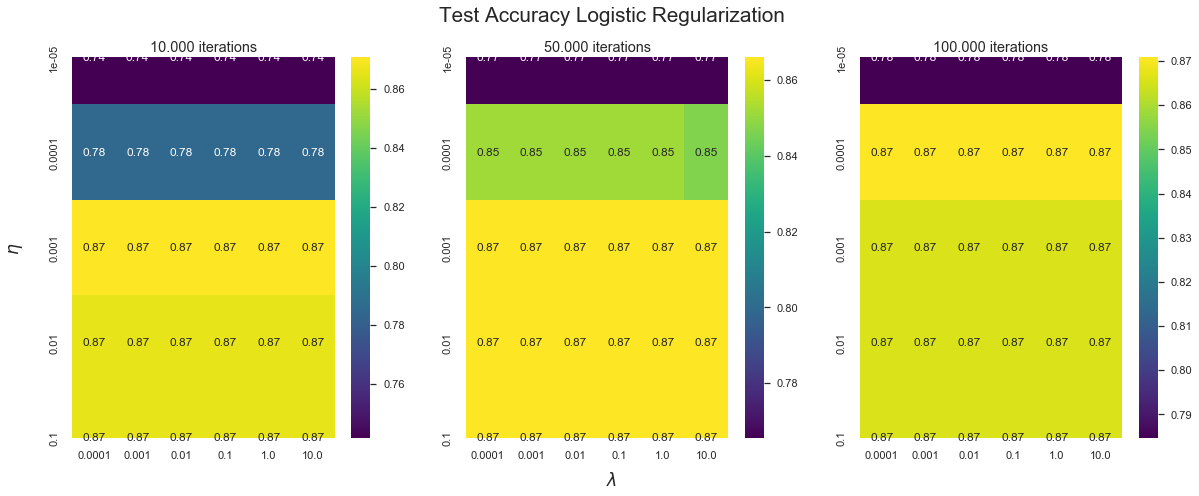

In [82]:
x_labels = (lambdas)
y_labels = (etas)


#  Intercept and L2 regularization - iterations
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy Logistic Regularization', size = "xx-large")
sns.heatmap(test_accuracy_lo1, annot=True, ax=ax1, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo2, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo3, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("10.000 iterations", size = "large")
ax2.set_title("50.000 iterations", size = "large")
ax3.set_title("100.000 iterations", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

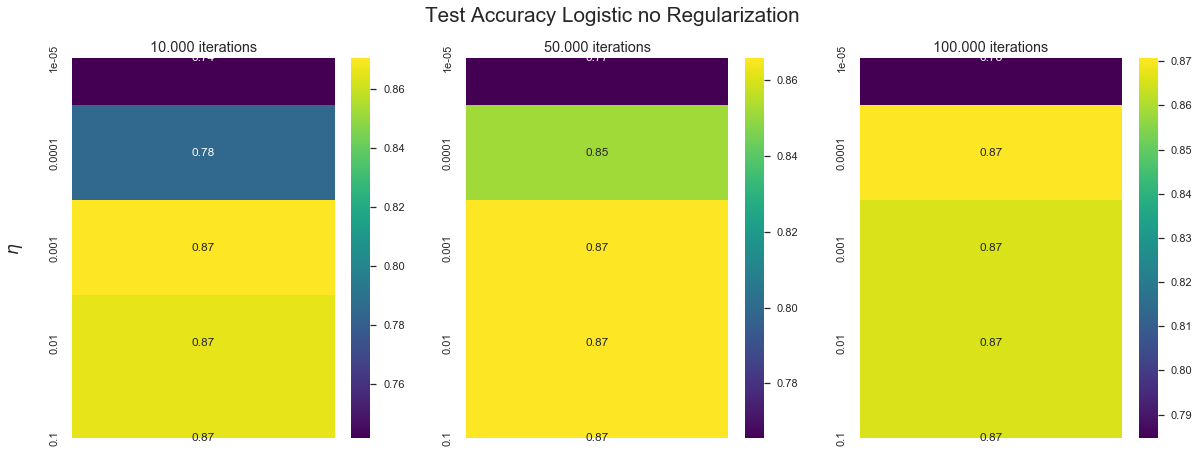

In [83]:
#  Intercept and no L2 regularization - iterations
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy Logistic no Regularization', size = "xx-large")
sns.heatmap(test_accuracy_lo7.reshape(5,1), annot=True, ax=ax1, cmap="viridis", xticklabels=0, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo8.reshape(5,1), annot=True, ax=ax2, cmap="viridis", xticklabels=0, yticklabels=y_labels)
sns.heatmap(test_accuracy_lo9.reshape(5,1), annot=True, ax=ax3, cmap="viridis", xticklabels=0, yticklabels=y_labels)
ax1.set_title("10.000 iterations", size = "large")
ax2.set_title("50.000 iterations", size = "large")
ax3.set_title("100.000 iterations", size = "large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

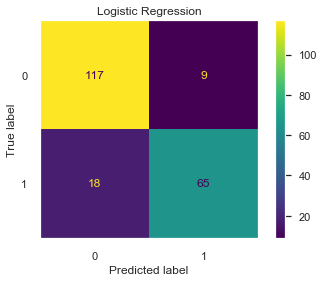

In [84]:
cm = confusion_matrix(y_test, y_pred_lo7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Logistic Regression")
plt.grid(False)
plt.show()

Accuracy: 87.08 %


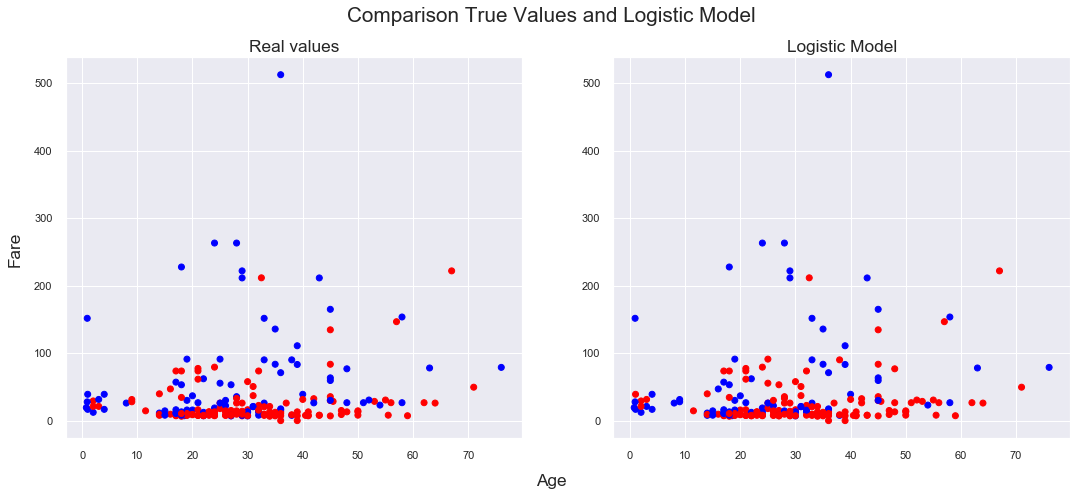

In [85]:
# Best Model Logistic Regression: comparison with the real data (no regularization and 10.000 iterations)

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Logistic Model', size = "xx-large")

colors = ['red', 'blue'] # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_pred_lo7.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Logistic Model", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, y_pred_lo7)*100).round(2), "%")

### NEURAL NETWORKS

Text(0.08, 0.5, '$\\eta$')

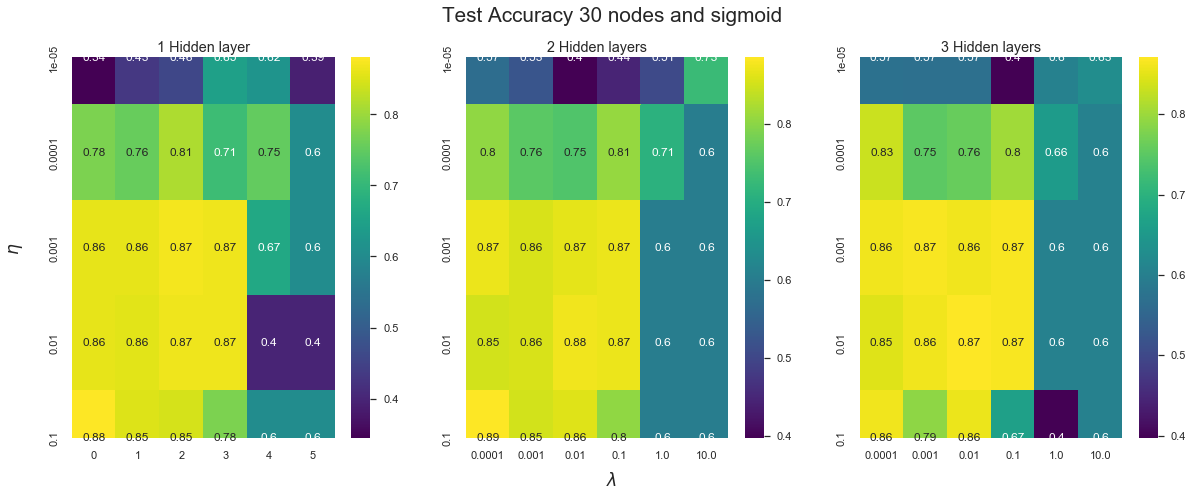

In [86]:
# 30 nodes and sigmoid - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and sigmoid', size = "xx-large")
sns.heatmap(test_accuracy_nnc1, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc2, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc3, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

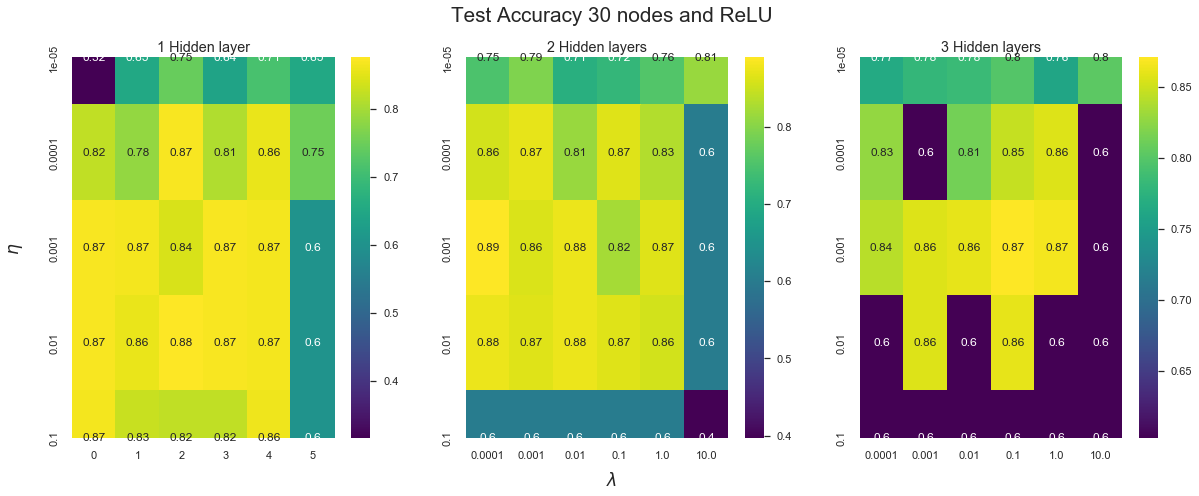

In [87]:
# 30 nodes and ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc4, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc5, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc6, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

Text(0.08, 0.5, '$\\eta$')

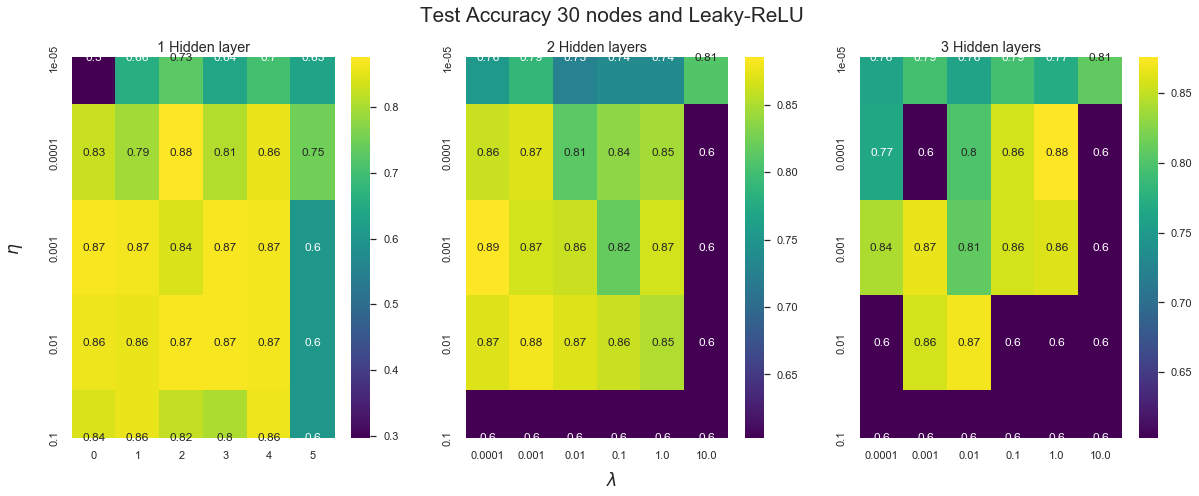

In [88]:
# 30 nodes and Leaky-ReLU - layers
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Test Accuracy 30 nodes and Leaky-ReLU', size = "xx-large")
sns.heatmap(test_accuracy_nnc7, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc8, annot=True, ax=ax2, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
sns.heatmap(test_accuracy_nnc9, annot=True, ax=ax3, cmap="viridis", xticklabels=x_labels, yticklabels=y_labels)
ax1.set_title("1 Hidden layer", size = "large")
ax2.set_title("2 Hidden layers", size = "large")
ax3.set_title("3 Hidden layers", size = "large")
fig.text(0.5, 0.03, '$\lambda$', ha='center', size = "x-large")
fig.text(0.08, 0.5, '$\eta$', va='center', rotation='vertical', size = "x-large")

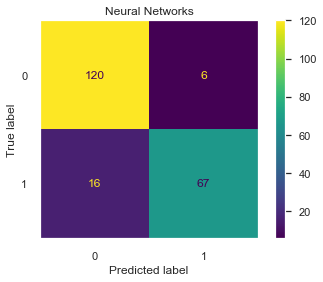

In [89]:
cm = confusion_matrix(y_test, y_predict_nnc20)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Neural Networks")
plt.grid(False)
plt.show()

Accuracy: 89.47 %


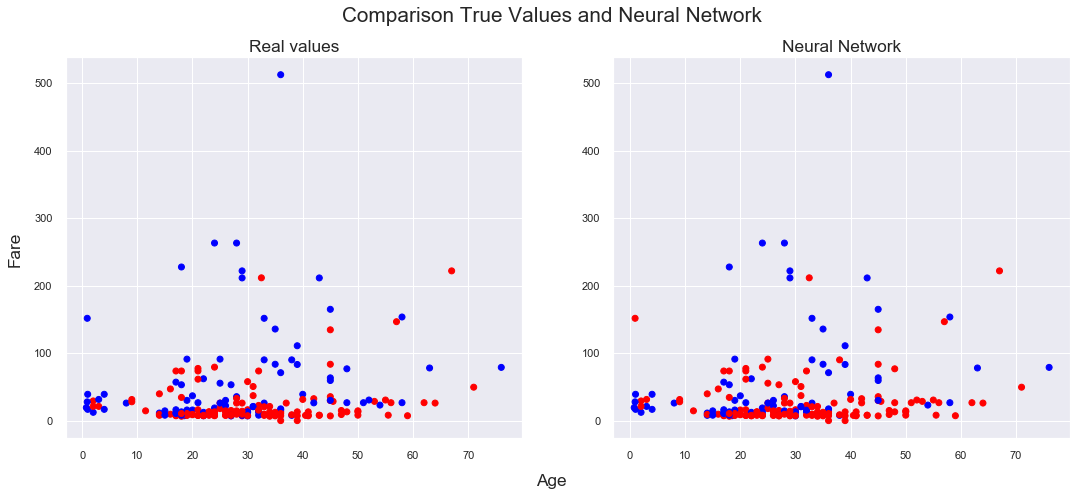

In [90]:
# Best Model Neural Networks: comparison with the real data (30 hidden nodes, ReLU and batch size = 8)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Neural Network', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_predict_nnc20.ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Neural Network", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, y_predict_nnc20)*100).round(2), "%")

### DECISION TREES

Accuracy =  88.0383 %


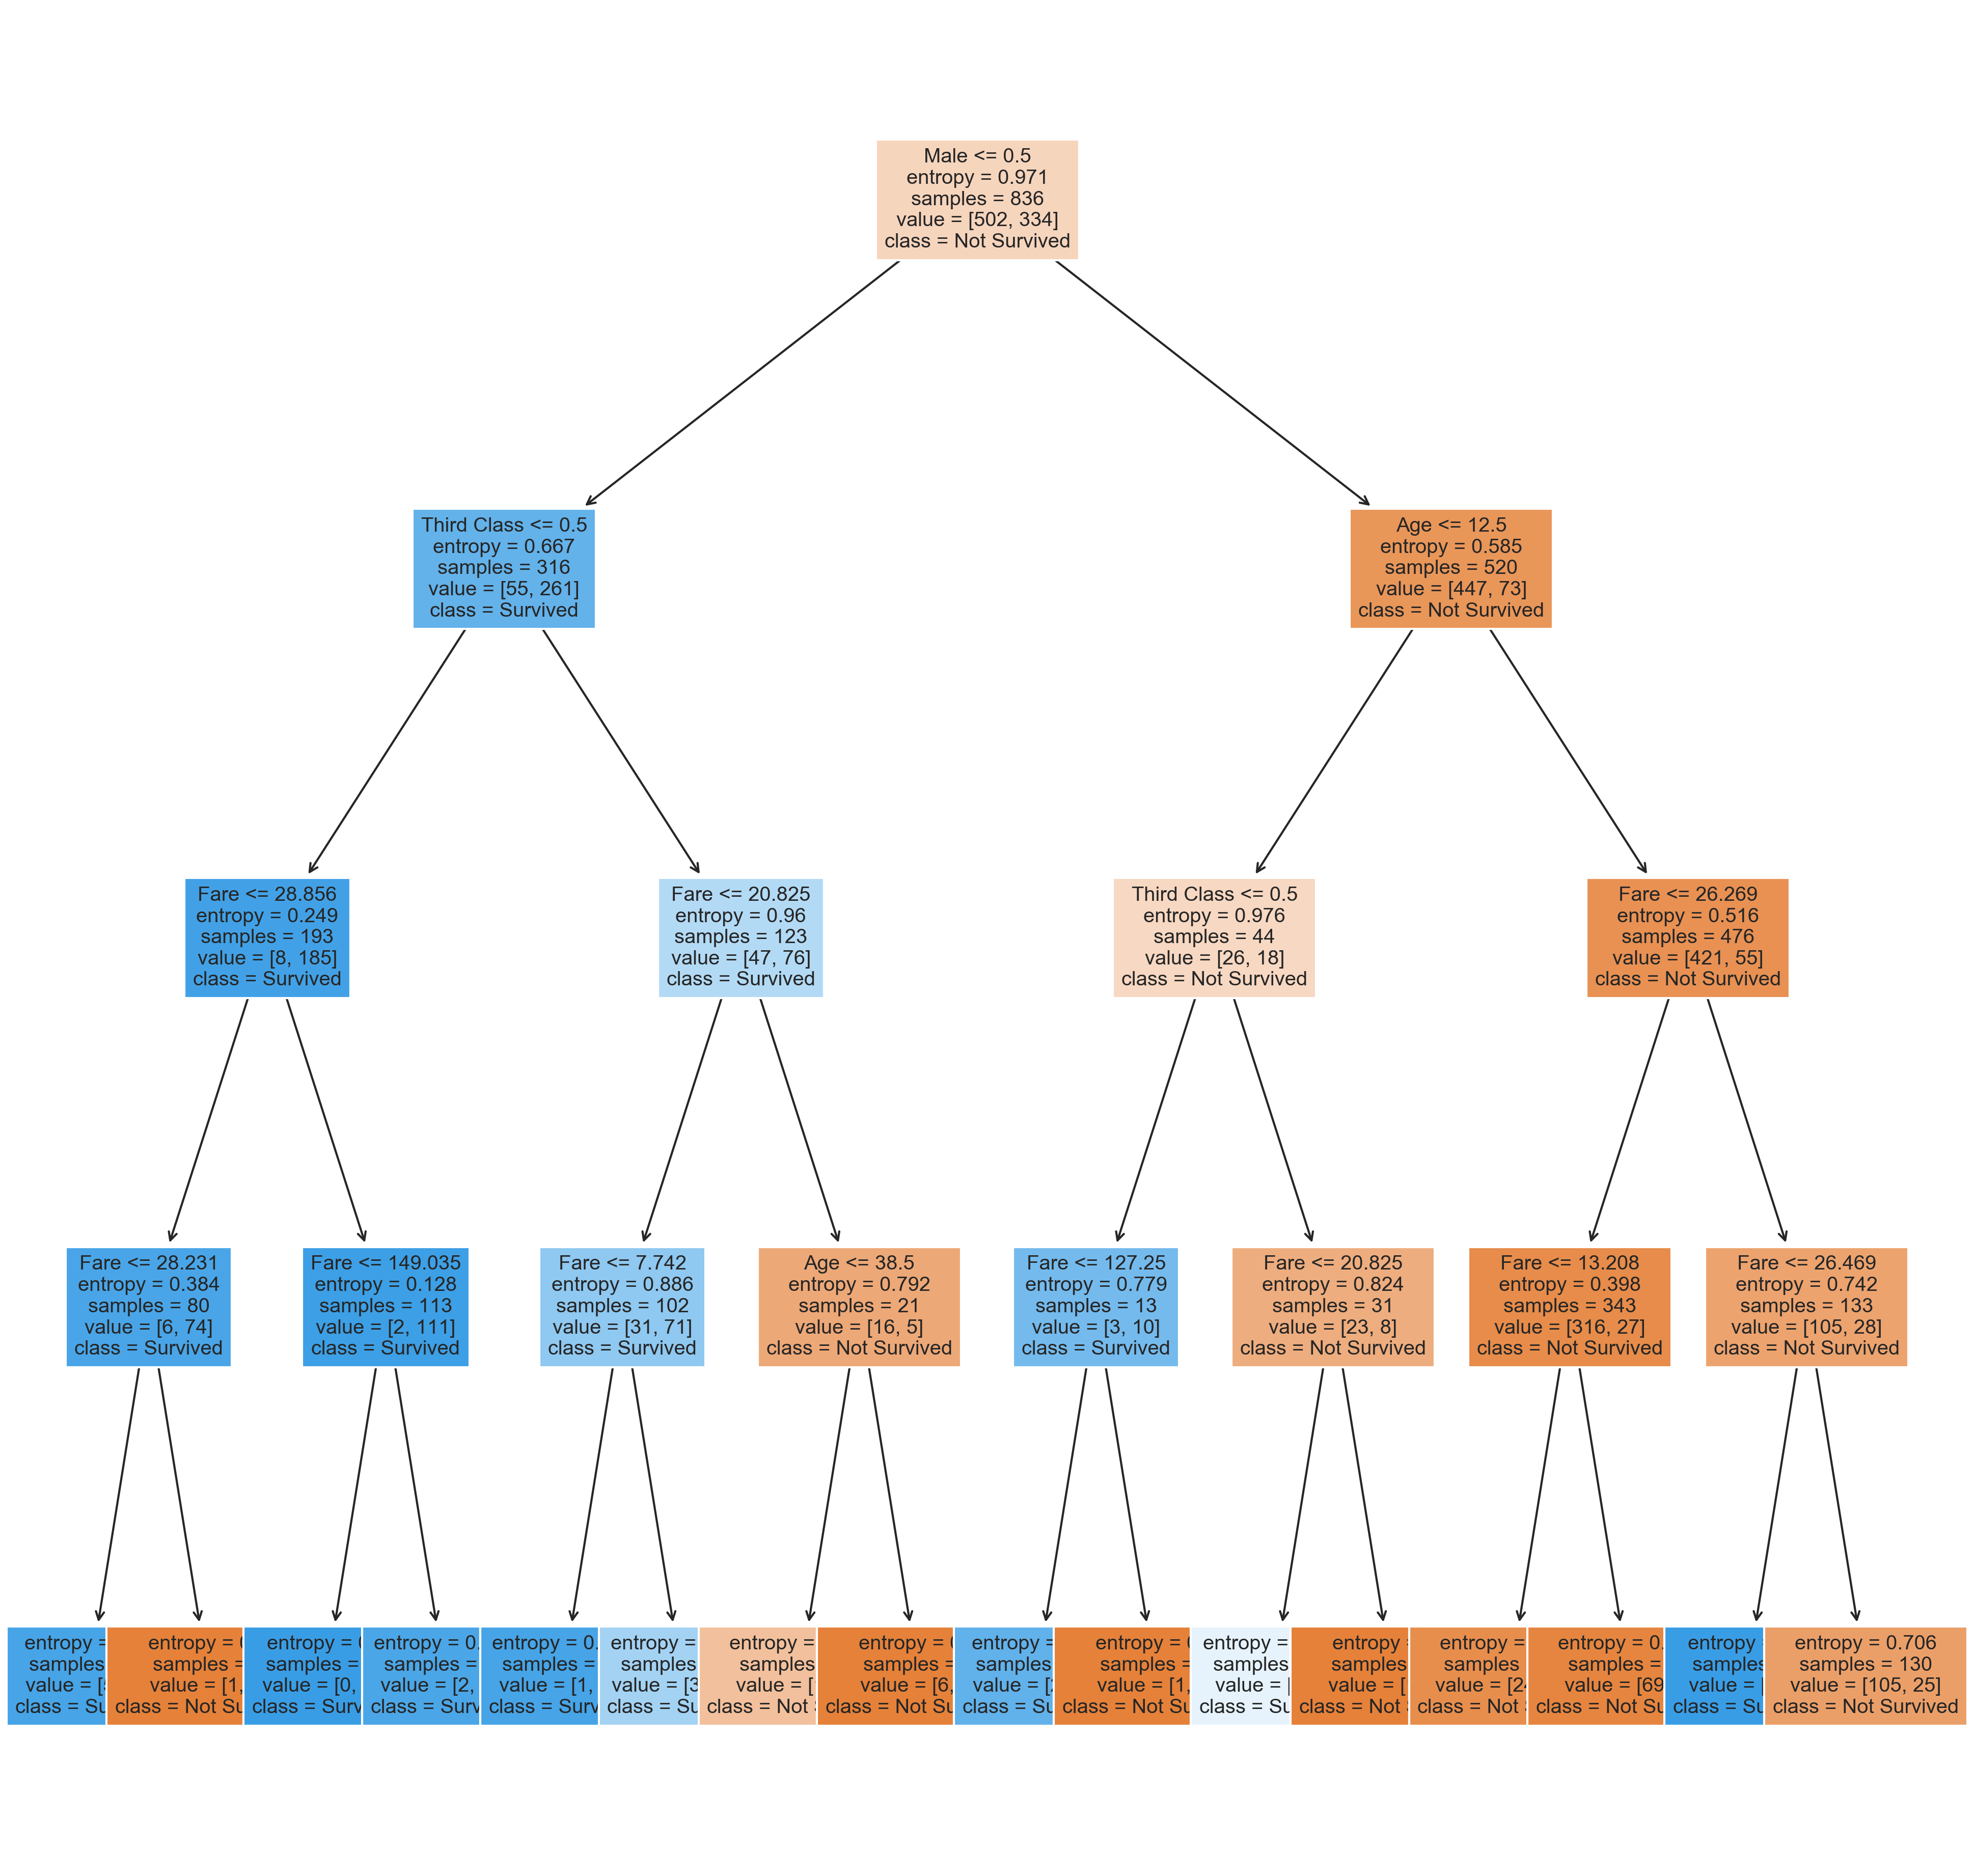

In [91]:
features = ["Age", "Fare", "First Class", "Second Class", "Third Class", "Male", "Female"]
categories = ['Not Survived', 'Survived']

tree_clf = DecisionTreeClassifier(max_depth=4, criterion = "entropy")
tree_best = tree_clf.fit(X_train_unscaled_onehot, y_train)
    

print("Accuracy = ", acc_tree3[1].round(6)*100, "%")
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,16), dpi=300)
tree.plot_tree(tree_best,
               feature_names = features, 
               class_names= categories,
               filled = True,
               fontsize = 9.6);

Text(0.08, 0.5, 'Max Depth')

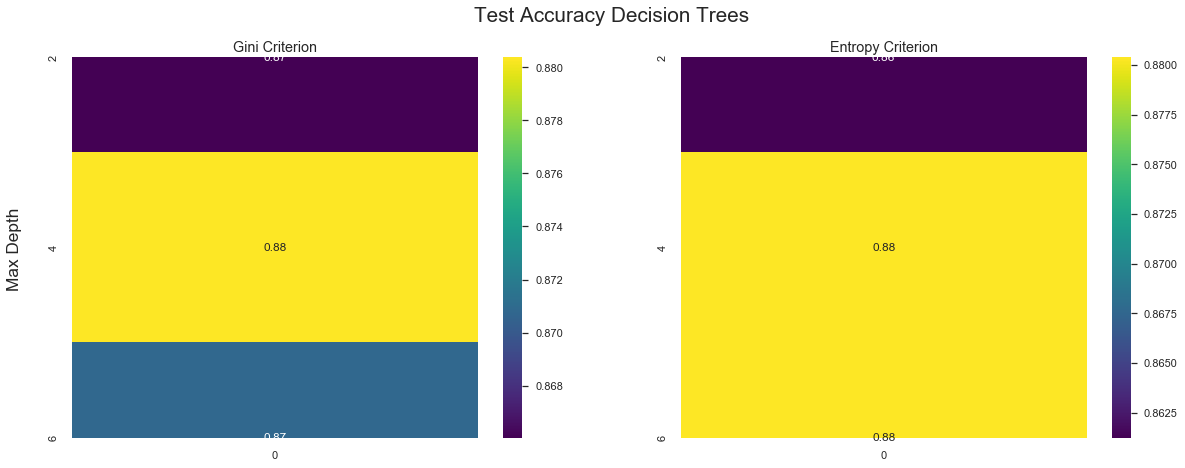

In [92]:
y_labels = (depths)

# Unscaled and scaled data - max depth
sns.set()
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Test Accuracy Decision Trees', size = "xx-large")
sns.heatmap(acc_tree1.reshape(3,1), annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels)
sns.heatmap(acc_tree2.reshape(3,1), annot=True, ax=ax2, cmap="viridis", yticklabels=y_labels)
ax1.set_title("Gini Criterion", size = "large")
ax2.set_title("Entropy Criterion", size = "large")
fig.text(0.08, 0.5, 'Max Depth', va='center', rotation='vertical', size = "x-large")

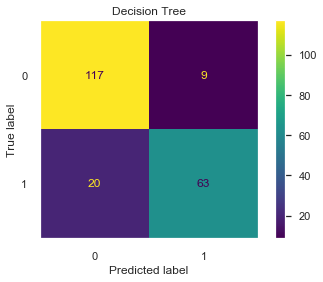

In [93]:
cm = confusion_matrix(y_test, y_pred_tree2[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Decision Tree")
plt.grid(False)
plt.show()

Accuracy: 88.04 %


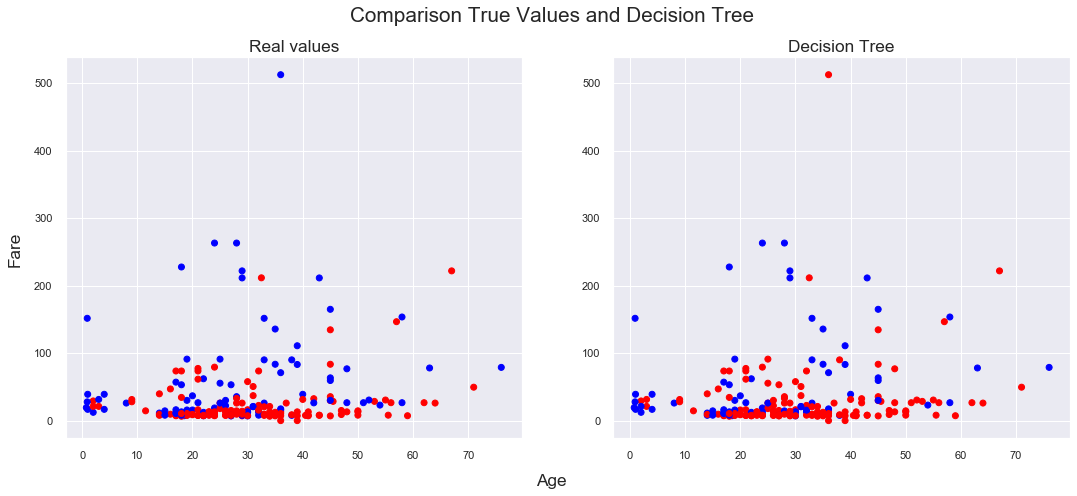

In [94]:
# Best Model Decision Trees: comparison with the real data (Scaled data, Entropy Criterion and 2 branches)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Decision Tree', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_pred_tree3[1].ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Decision Tree", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, y_pred_tree3[1])*100).round(2), "%")

### BAGGING

Text(0.08, 0.5, 'Number of Estimators')

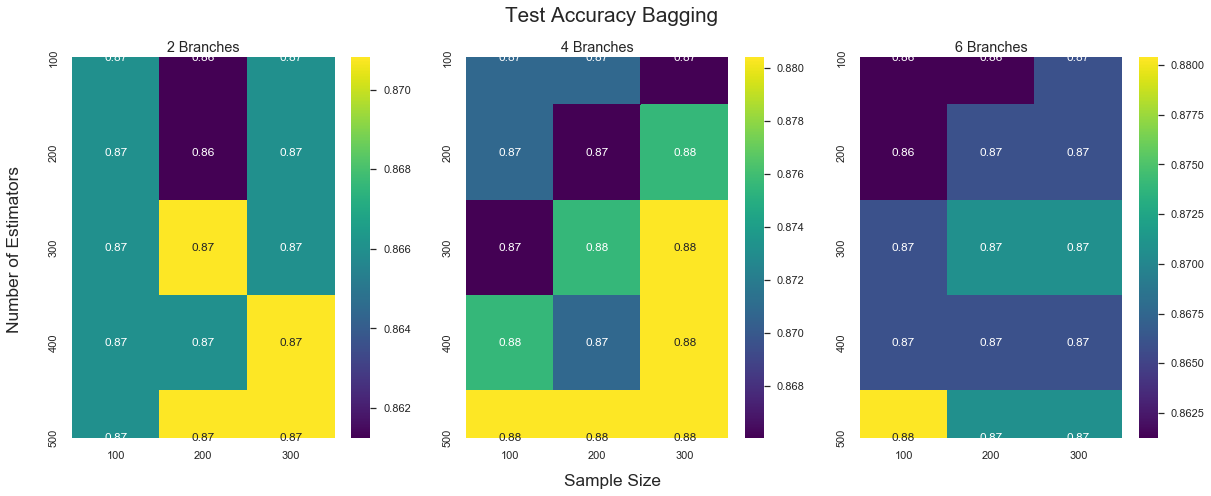

In [95]:
y_labels = (estimators)
x_labels = (samples)

# Bagging with different numbers of etsimators and sample sieze - max depth
sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Test Accuracy Bagging', size = "xx-large")
sns.heatmap(acc_bag1.T, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_bag2.T, annot=True, ax=ax2, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_bag3.T, annot=True, ax=ax3, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
ax1.set_title("2 Branches", size = "large")
ax2.set_title("4 Branches", size = "large")
ax3.set_title("6 Branches", size = "large")
fig.text(0.5, 0.03, 'Sample Size', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Number of Estimators', va='center', rotation='vertical', size = "x-large")

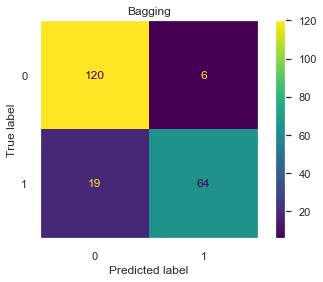

In [96]:
cm = confusion_matrix(y_test, pred_bag2[12])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Bagging")
plt.grid(False)
plt.show()

Accuracy: 88.04 %


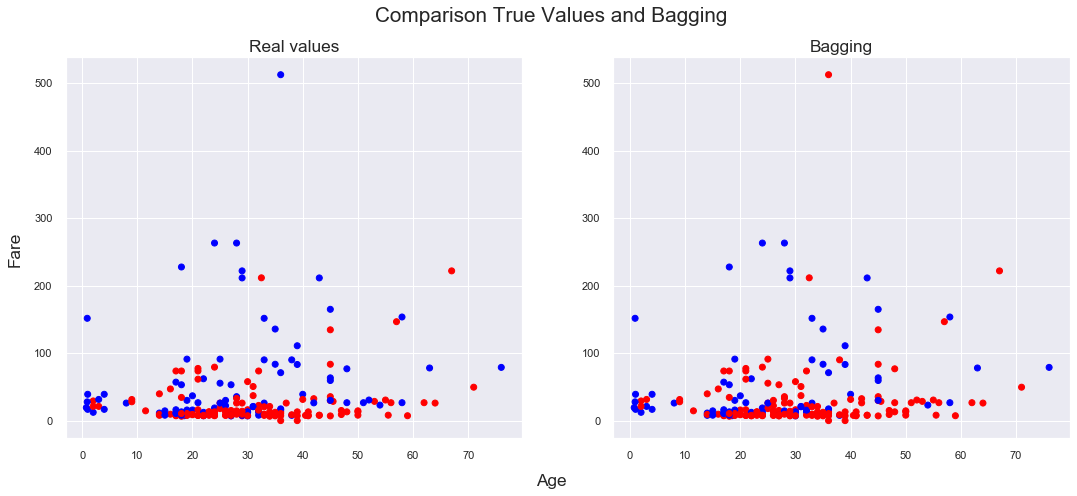

In [97]:
# Best Model Bagging: comparison with the real data (Tree with 4 branches, 300 estimators with 300 obs each)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Bagging', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = pred_bag2[12].ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Bagging", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, pred_bag2[12])*100).round(2), "%")

### RANDOM FORESTS

Text(0.08, 0.5, 'Number of Estimators')

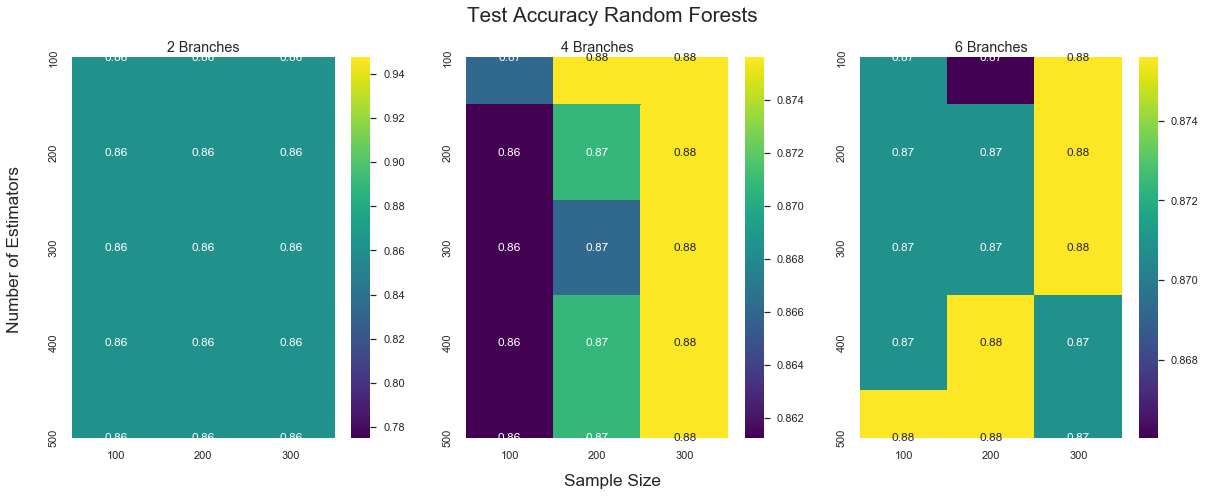

In [98]:
# Random forests with different number of estimators and sample size - max depth

sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Test Accuracy Random Forests', size = "xx-large")
sns.heatmap(acc_rf1.T, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_rf2.T, annot=True, ax=ax2, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_rf3.T, annot=True, ax=ax3, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
ax1.set_title("2 Branches", size = "large")
ax2.set_title("4 Branches", size = "large")
ax3.set_title("6 Branches", size = "large")
fig.text(0.5, 0.03, 'Sample Size', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Number of Estimators', va='center', rotation='vertical', size = "x-large")

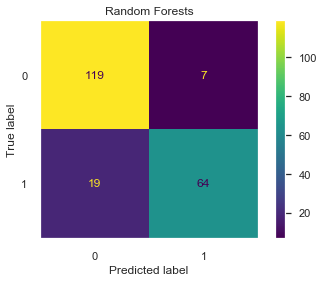

In [99]:
cm = confusion_matrix(y_test, pred_rf2[5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Random Forests")
plt.grid(False)
plt.show()

Accuracy: 87.56 %


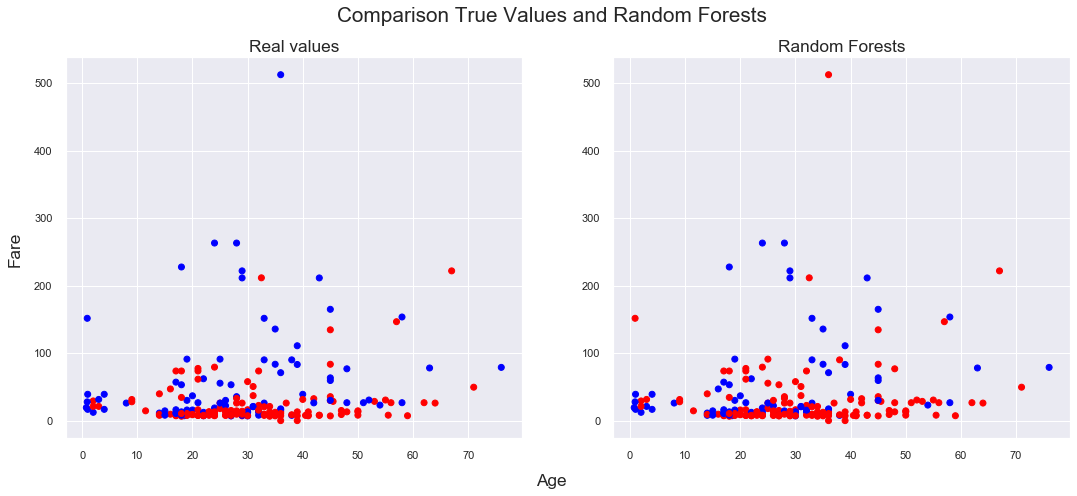

In [100]:
# Best Model Random Forests: comparison with the real data (Tree with 4 branches, 100 estimators with 200 obs each)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Random Forests', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = pred_rf2[5].ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Random Forests", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, pred_rf2[5])*100).round(2), "%")

### GRADIENT BOOSTING#

Text(0.08, 0.5, 'Number of Estimators')

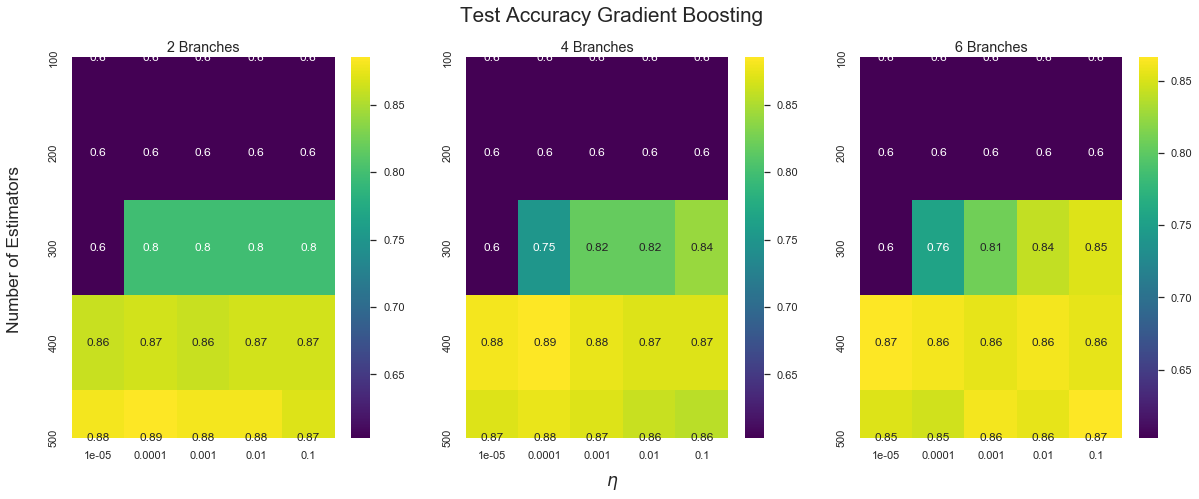

In [101]:
x_labels = (etas)
y_labels = (estimators)

# Gradient Boosting with different number of estimators and eta - max depth

sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Test Accuracy Gradient Boosting', size = "xx-large")
sns.heatmap(acc_gb1, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_gb2, annot=True, ax=ax2, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_gb3, annot=True, ax=ax3, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
ax1.set_title("2 Branches", size = "large")
ax2.set_title("4 Branches", size = "large")
ax3.set_title("6 Branches", size = "large")
fig.text(0.5, 0.03, '$\eta$', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Number of Estimators', va='center', rotation='vertical', size = "x-large")

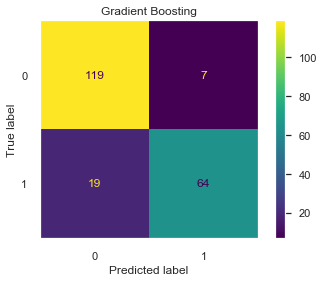

In [102]:
cm = confusion_matrix(y_test, pred_gb2[21])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "Gradient Boosting")
plt.grid(False)
plt.show()

Accuracy: 88.52 %


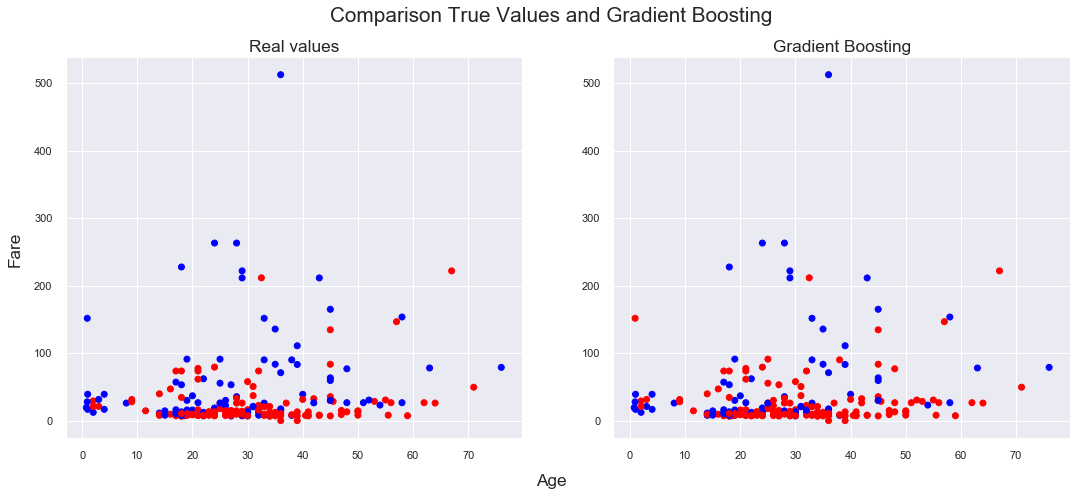

In [103]:
# Best Model Gradient Boosting: comparison with the real data (Tree with 2 branches, 200 estimators and learning rate of 0.01)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values and Gradient Boosting', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = pred_gb1[21].ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("Gradient Boosting", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, pred_gb1[21])*100).round(2), "%")

### ADABOOST

Text(0.08, 0.5, 'Number of Estimators')

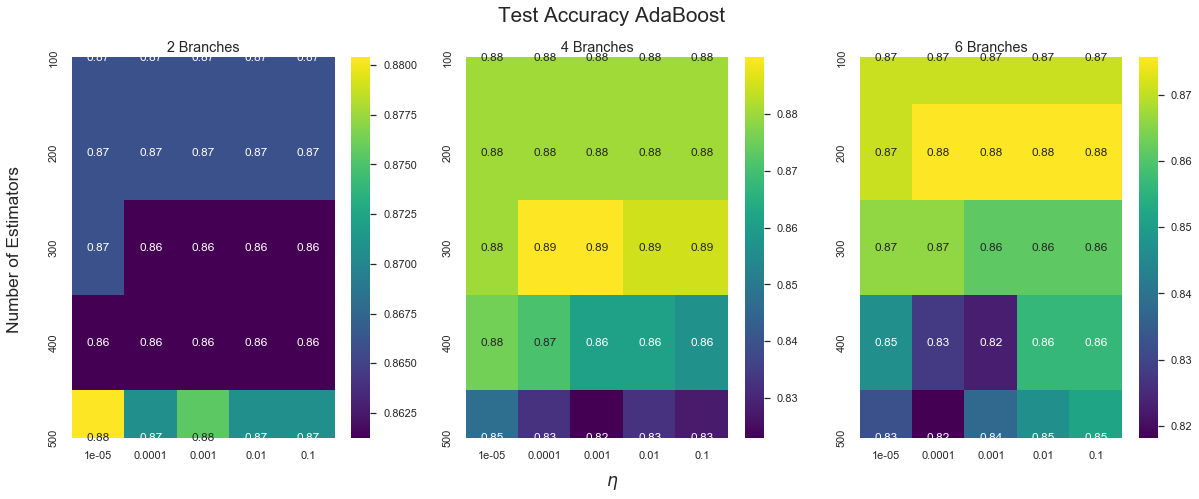

In [104]:
# AdaBoost with different number of estimators and eta - max depth

sns.set()
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Test Accuracy AdaBoost', size = "xx-large")
sns.heatmap(acc_ada1, annot=True, ax=ax1, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_ada2, annot=True, ax=ax2, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
sns.heatmap(acc_ada3, annot=True, ax=ax3, cmap="viridis", yticklabels=y_labels, xticklabels = x_labels)
ax1.set_title("2 Branches", size = "large")
ax2.set_title("4 Branches", size = "large")
ax3.set_title("6 Branches", size = "large")
fig.text(0.5, 0.03, '$\eta$', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Number of Estimators', va='center', rotation='vertical', size = "x-large")

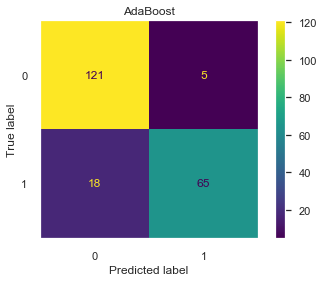

In [105]:
cm = confusion_matrix(y_test, pred_ada2[11])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title = "AdaBoost")
plt.grid(False)
plt.show()

Accuracy: 89.0 %


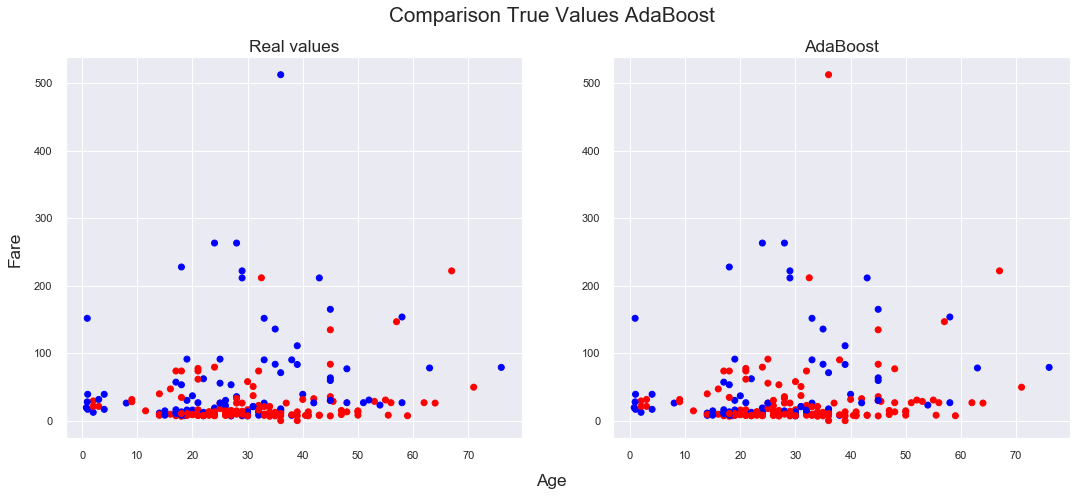

In [106]:
# Best Model AdaBoost: comparison with the real data (Tree with 4 branches, 200 estimators and learning rate of 0.001)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparison True Values AdaBoost', size = "xx-large")

colors = ['red', 'blue']    # red = not survived, blue = survived
levels = [0, 1]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')         
          
ax1.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = y_test.ravel(), cmap=cmap, norm=norm)
ax2.scatter(X_test_unscaled_onehot[:,0], X_test_unscaled_onehot[:,1], c = pred_ada2[11].ravel(), cmap=cmap, norm=norm)

ax1.set_title("Real values", size = "x-large")
ax2.set_title("AdaBoost", size = "x-large")

fig.text(0.5, 0.03, 'Age', ha='center', size = "x-large")
fig.text(0.08, 0.5, 'Fare', va='center', rotation='vertical', size = "x-large")

print('Accuracy:', (accuracy_score(y_test, pred_ada2[11])*100).round(2), "%")